# Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Objectives

There are quite a few goals for this case study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
   
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
# supress warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os 
os.chdir(r"C:\Users\josev\Downloads\Lead Scoring Assignment")
path = os.getcwd()
path   

'C:\\Users\\josev\\Downloads\\Lead Scoring Assignment'

In [3]:
df = pd.read_csv("Leads.csv")
pd.set_option("display.max_columns",None)
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
[i for i in df.columns ]

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [5]:
# since the 'Prospect ID' and 'Lead Number has no use we drop it 
df.drop(columns=['Prospect ID','Lead Number'], inplace = True)

In [6]:
## shape of data frame
df.shape

(9240, 35)

In [7]:
## df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [8]:
df.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9103.000000                  9240.000000   
mean      0.385390     3.445238                   487.698268   
std       0.486714     4.854853                   548.021466   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [9]:
col = [i for i in df.columns]

In [10]:
for i in col:
    print("*"*60)
    print(df[i].value_counts(normalize=True))
    print("="*60)

************************************************************
Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64
************************************************************
Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: propo

In [11]:
# Missing values
round(df.isnull().sum()/df.shape[0]*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

## Data Cleaning

- Encoding categorical variables
- Missing Value Handling
- Convert the 'select' into the NaN
- Dropping columns more than 70% null values

In [12]:
binary_col = ['Do Not Email',
 'Do Not Call', 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
 'Get updates on DM Content','I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [13]:
for i in binary_col:
    print("*"*60)
    print(df[i].value_counts())
    print("="*60)

************************************************************
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
************************************************************
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
************************************************************
Search
No     9226
Yes      14
Name: count, dtype: int64
************************************************************
Magazine
No    9240
Name: count, dtype: int64
************************************************************
Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64
************************************************************
X Education Forums
No     9239
Yes       1
Name: count, dtype: int64
************************************************************
Newspaper
No     9239
Yes       1
Name: count, dtype: int64
************************************************************
Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64
***************

In [14]:
# binary column encoding
for i in binary_col:
    df[i] = df[i].apply(lambda x: 1 if x.lower()=='yes' else 0)

In [15]:
df[binary_col].head()

Do Not Email  Do Not Call  Search  Magazine  Newspaper Article  \
0             0            0       0         0                  0   
1             0            0       0         0                  0   
2             0            0       0         0                  0   
3             0            0       0         0                  0   
4             0            0       0         0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
0                                  0                          0   
1                                  0                          0   
2                                  0                          0   
3                                  0                          0   
4                                  0                          0   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  
0                                       0  
1                                       0  
2                                       1  
3                                       0  
4                                       0

## converting 'select' to NaN values

In [16]:
# listing the categorical varibales info
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9204 non-null   object
 2   Last Activity                                  9137 non-null   object
 3   Country                                        6779 non-null   object
 4   Specialization                                 7802 non-null   object
 5   How did you hear about X Education             7033 non-null   object
 6   What is your current occupation                6550 non-null   object
 7   What matters most to you in choosing a course  6531 non-null   object
 8   Tags                                           5887 non-null   object
 9   Lead Quality                                   4473 non-null   

In [17]:
cat_columns = [i for i in df.select_dtypes(include='object').columns]


In [18]:
# value counts of categorical columns in the df
for i in cat_columns:
    print(i)
    print("*"*60)
    print(df[i].value_counts(normalize=True))
    print("="*60)

Lead Origin
************************************************************
Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64
Lead Source
************************************************************
Lead Source
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM           

In [19]:
# imputing nan values for'select' items present in cat_columns
select_col = ['Specialization', 'How did you hear about X Education','City']
for i in select_col:
    df[i] = df[i].apply(lambda x: np.NaN if isinstance(x,str) and x.lower() == 'select' else x)

In [20]:
for i in select_col:
    print("*"*60)
    print(df[i].value_counts(normalize=True))
    print("="*60)


************************************************************
Specialization
Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: proportion, dtype: float64
************************************************************
Ho

## Handling null values

In [21]:
# hadling null values
round(df.isnull().sum()/df.shape[0]*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [22]:
df = df.replace('Select', np.nan)

In [23]:
round(df.isnull().sum()/df.shape[0]*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [24]:
# Dropping columns having more than 60% null values
df.drop(df.loc[:,list(round(df.isnull().sum()/df.shape[0],2)>0.60)].columns,axis=1,inplace=True)

In [25]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [26]:
df['Lead Quality'].value_counts(normalize =True)

Lead Quality
Might be             0.348759
Not Sure             0.244131
High in Relevance    0.142410
Worst                0.134362
Low in Relevance     0.130338
Name: proportion, dtype: float64

In [27]:
# the null values in the 'Lead Quality' column is replaced with 'Not Sure' case
df['Lead Quality']=df['Lead Quality'].replace(np.nan,'Not Sure')
df['Lead Quality'].value_counts(normalize=True)

Lead Quality
Not Sure             0.634091
Might be             0.168831
High in Relevance    0.068939
Worst                0.065043
Low in Relevance     0.063095
Name: proportion, dtype: float64

In [28]:
round(df.isnull().sum()/df.shape[0]*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

- Since 'Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score' columns have high null values, imputing null values with these columns have high risk

In [29]:
df.drop(columns = [ 'Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],inplace=True)

In [30]:
# impute NaN values of City by Mumbai
df['City'].replace(np.nan, 'Mumbai', inplace =True)
# impute NaN values of 'Tags' column
df['Tags'].replace(np.nan,'Will revert after reading the email',inplace=True)
# impute NaN values to 'Specialization' column with a new category 'Other Specialization' Since it have different mode
df['Specialization'].replace(np.nan, 'Other Specialization', inplace=True)
# impute NaN value to 'What is your current occupation' with its mode 'unemployed'
df['What is your current occupation'].replace(np.nan, 'Unemployed', inplace=True)
# impute NaN value to 'Country' column
df['Country'].replace(np.nan, 'India',inplace=True)
# impute NaN value to 'What matters most to you in choosing a course' column
df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects', inplace=True)



In [31]:
df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [32]:
# Since the remaining null values were less that 2%, it will not affect our analysis, so drop it
df.dropna(inplace=True)

In [33]:
round(df.isnull().sum()/df.shape[0]*100,2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

## EDA

### Univariate Analysis

### categorical columns

In [34]:
cat_cols = [i for i in df.select_dtypes('object')]

In [35]:
for i in cat_cols:
    print("*"*60)
    print(df[i].value_counts())
    print("="*60)
    print(df[i].value_counts(normalize=True))
    print("-*"*60)

************************************************************
Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64
Lead Origin
Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: proportion, dtype: float64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
************************************************************
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1


In [36]:
# target variable 'converted'
df['Converted'].value_counts(normalize=True)

Converted
0    0.621446
1    0.378554
Name: proportion, dtype: float64

- We have a good size sample for both converted and non-converted

#### numerical columns

In [38]:
df.select_dtypes('float64').describe(percentiles= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9074.000000                  9074.000000           9074.000000
mean      3.456028                   482.887481              2.370151
std       4.858802                   545.256560              2.160871
min       0.000000                     0.000000              0.000000
10%       0.000000                     0.000000              0.000000
20%       0.000000                     0.000000              0.000000
30%       2.000000                    55.000000              1.000000
40%       2.000000                   144.000000              2.000000
50%       3.000000                   246.000000              2.000000
60%       3.000000                   367.000000              2.500000
70%       4.000000                   693.000000              3.000000
80%       5.000000                  1078.400000              4.000000
90%       7.000000                  1373.000000              5.000000
99%      17.000000                  1839.000000              9.000000
max     251.000000                  2272.000000             55.000000

<Axes: >

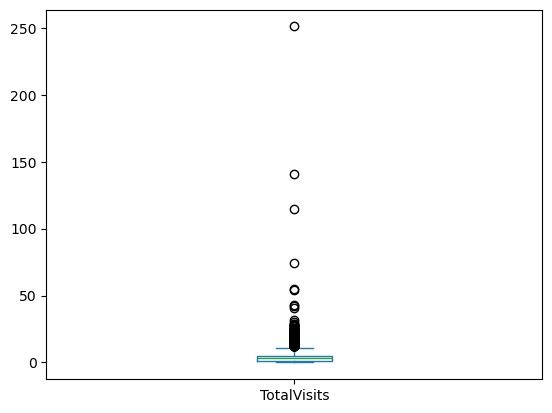

In [39]:
df['TotalVisits'].plot.box()

<Axes: >

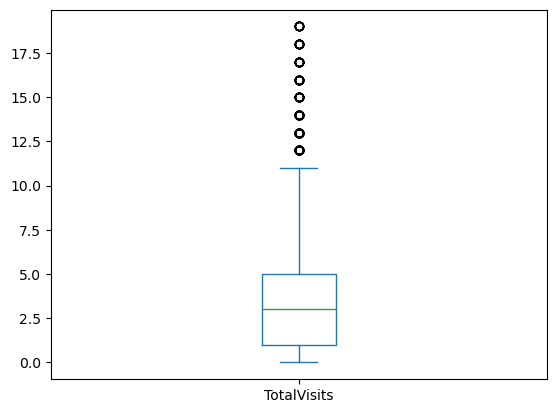

In [40]:
df.TotalVisits[df['TotalVisits']<20].plot.box()

In [41]:
df.select_dtypes(include='int64').describe()

Do Not Email  Do Not Call    Converted       Search  Magazine  \
count   9074.000000  9074.000000  9074.000000  9074.000000    9074.0   
mean       0.078907     0.000220     0.378554     0.001543       0.0   
std        0.269608     0.014845     0.485053     0.039251       0.0   
min        0.000000     0.000000     0.000000     0.000000       0.0   
25%        0.000000     0.000000     0.000000     0.000000       0.0   
50%        0.000000     0.000000     0.000000     0.000000       0.0   
75%        0.000000     0.000000     1.000000     0.000000       0.0   
max        1.000000     1.000000     1.000000     1.000000       0.0   

       Newspaper Article  X Education Forums    Newspaper  \
count        9074.000000         9074.000000  9074.000000   
mean            0.000220            0.000110     0.000110   
std             0.014845            0.010498     0.010498   
min             0.000000            0.000000     0.000000   
25%             0.000000            0.000000     0.000000   
50%             0.000000            0.000000     0.000000   
75%             0.000000            0.000000     0.000000   
max             1.000000            1.000000     1.000000   

       Digital Advertisement  Through Recommendations  \
count            9074.000000              9074.000000   
mean                0.000441                 0.000771   
std                 0.020992                 0.027766   
min                 0.000000                 0.000000   
25%                 0.000000                 0.000000   
50%                 0.000000                 0.000000   
75%                 0.000000                 0.000000   
max                 1.000000                 1.000000   

       Receive More Updates About Our Courses  \
count                                  9074.0   
mean                                      0.0   
std                                       0.0   
min                                       0.0   
25%                                       0.0   
50%                                       0.0   
75%                                       0.0   
max                                       0.0   

       Update me on Supply Chain Content  Get updates on DM Content  \
count                             9074.0                     9074.0   
mean                                 0.0                        0.0   
std                                  0.0                        0.0   
min                                  0.0                        0.0   
25%                                  0.0                        0.0   
50%                                  0.0                        0.0   
75%                                  0.0                        0.0   
max                                  0.0                        0.0   

       I agree to pay the amount through cheque  \
count                                    9074.0   
mean                                        0.0   
std                                         0.0   
min                                         0.0   
25%                                         0.0   
50%                                         0.0   
75%                                         0.0   
max                                         0.0   

       A free copy of Mastering The Interview  
count                             9074.000000  
mean                                 0.318272  
std                                  0.465831  
min                                  0.000000  
25%                                  0.000000  
50%                                  0.000000  
75%                                  1.000000  
max                                  1.000000

- from here most of the colums are of 0, 1 categories - no inference can be made out of this
- In case of 'Total Visits' and 'Total Time Spent on Website' and 'Page Views Per Visit' - 
        - In all the three columns have outliers
        - 

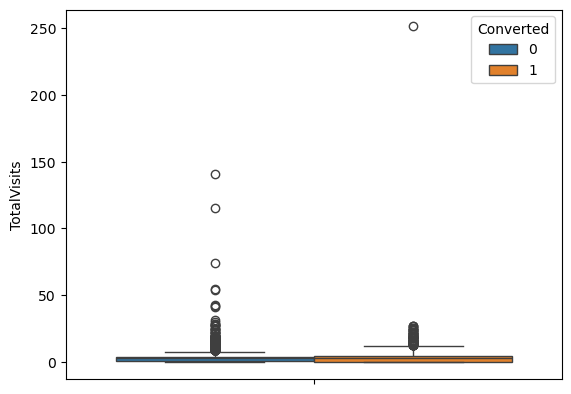

In [42]:
sns.boxplot(y='TotalVisits',hue='Converted',data=df)
plt.show()

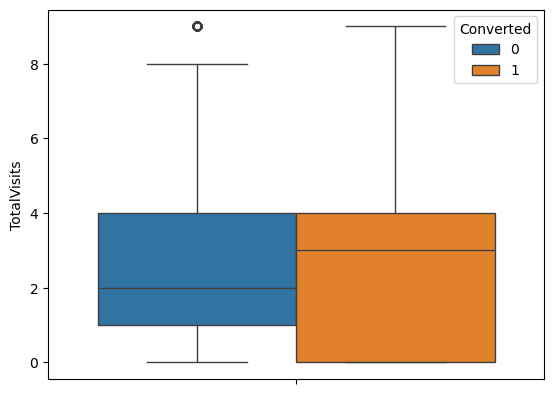

In [43]:
hight_time_spend = df[df['TotalVisits']<10]
sns.boxplot(y='TotalVisits',hue='Converted',data=hight_time_spend)
plt.show()

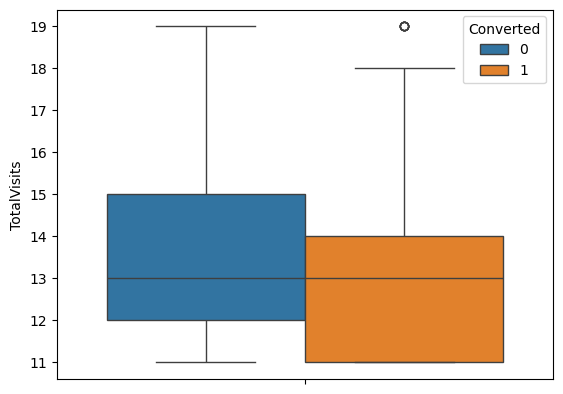

In [44]:
hight_time_spend = df[(df['TotalVisits']>10)&(df['TotalVisits']<20)]
sns.boxplot(y='TotalVisits',hue='Converted',data=hight_time_spend)
plt.show()

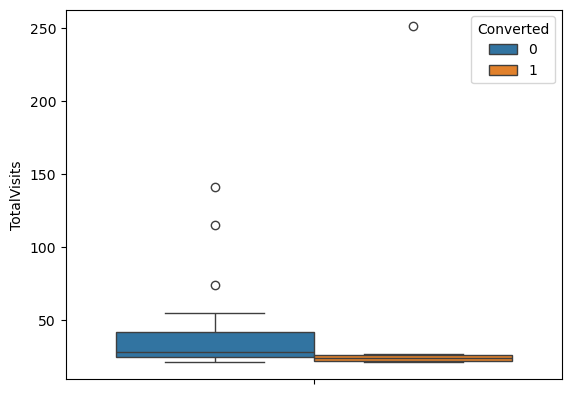

In [45]:
hight_time_spend = df[df['TotalVisits']>20]
sns.boxplot(y='TotalVisits',hue='Converted',data=hight_time_spend)
plt.show()

- conversion rate is low for the total visists is higher than 15
- conversion rate is high for the total visists less than 10
- so we drop the totalvisits column having higher than 10 visits, since it gives no sense to analysis.

In [46]:
df = df[~(df['TotalVisits']>10)]

In [47]:
df.TotalVisits.isnull().sum()

0

<Axes: >

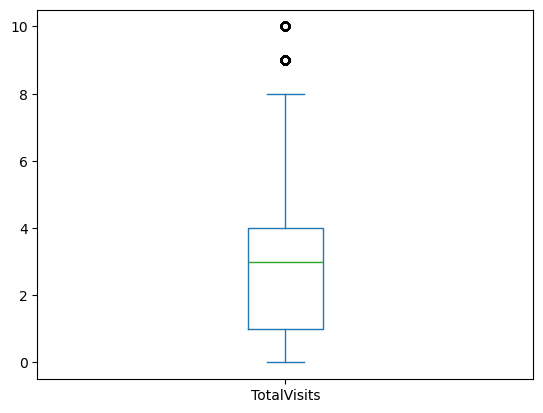

In [48]:
df.TotalVisits.plot.box()

In [49]:
higher_time_spent_df = df[(df['Total Time Spent on Website']>1800)]

<Axes: xlabel='Total Time Spent on Website'>

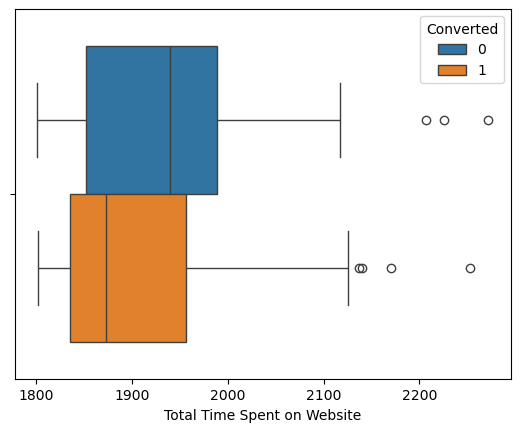

In [50]:
sns.boxplot(x='Total Time Spent on Website',hue='Converted',data=higher_time_spent_df)

- Since the 'total time spent on website' greater than 1800 have a little conversion rate, we drop higher time spent people

In [51]:
df=df[~(df['Total Time Spent on Website']>1800)]

<Axes: >

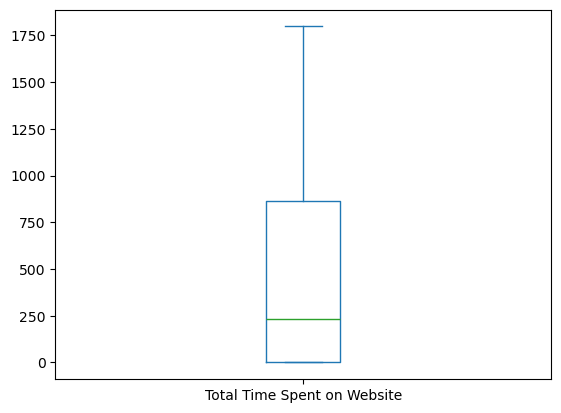

In [52]:
df['Total Time Spent on Website'].plot.box()

<Axes: xlabel='Total Time Spent on Website'>

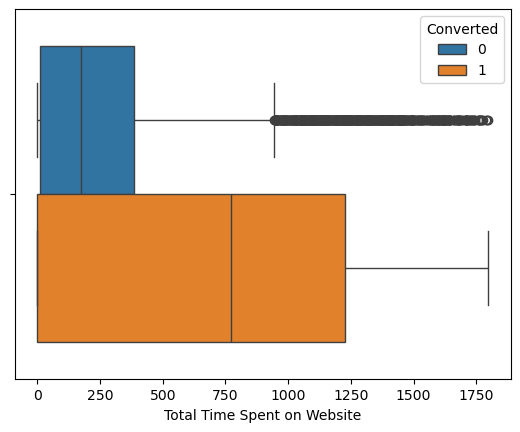

In [53]:
sns.boxplot(x='Total Time Spent on Website',hue='Converted',data=df)

<Axes: >

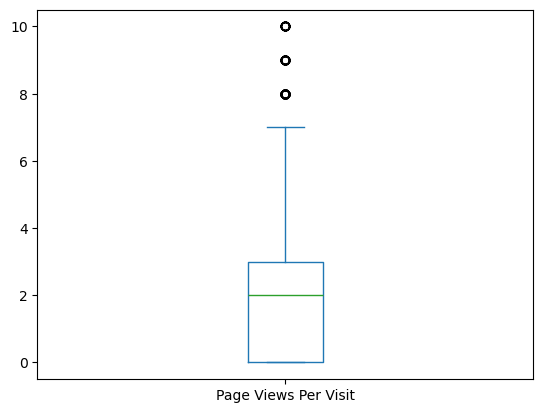

In [54]:
df['Page Views Per Visit'].plot.box()

In [55]:
df=df[~(df['Page Views Per Visit']>7)]

<Axes: xlabel='Page Views Per Visit'>

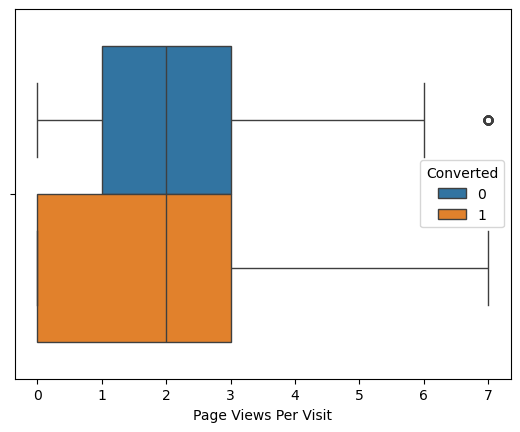

In [56]:
sns.boxplot(x='Page Views Per Visit', hue='Converted', data = df)

In [57]:
df=df[~(df['Page Views Per Visit']>7)]

<Axes: >

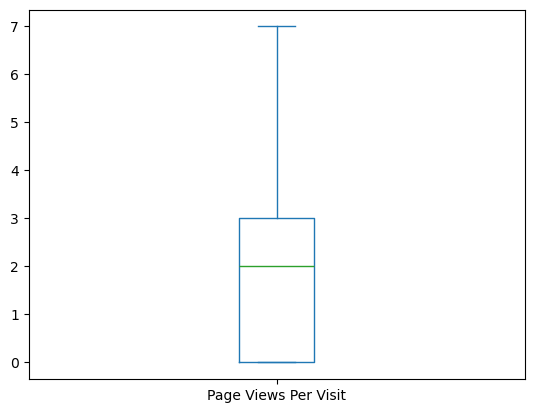

In [58]:
df['Page Views Per Visit'].plot.box()

In [59]:
df.select_dtypes('float64').describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  8464.000000                  8464.000000           8464.000000
mean      2.801985                   451.793715              2.134576
std       2.368561                   519.875146              1.743348
min       0.000000                     0.000000              0.000000
25%       0.000000                     0.000000              0.000000
50%       3.000000                   228.000000              2.000000
75%       4.000000                   858.000000              3.000000
max      10.000000                  1798.000000              7.000000

- For in this case of those who spend more than 20 time visists were less converted
- For in the case of people who visit 10 to 20 times were eqully and proportionately converted
- For in the case of people who visit less than 10 times were most proportionally converted

In [60]:
df.shape

(8464, 29)

## Bivariate Analysis

#### numeric columns with target variable 'Converted'

In [61]:
num_cols = [i for i in df.select_dtypes(['int64']).columns]
num_cols

['Do Not Email',
 'Do Not Call',
 'Converted',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

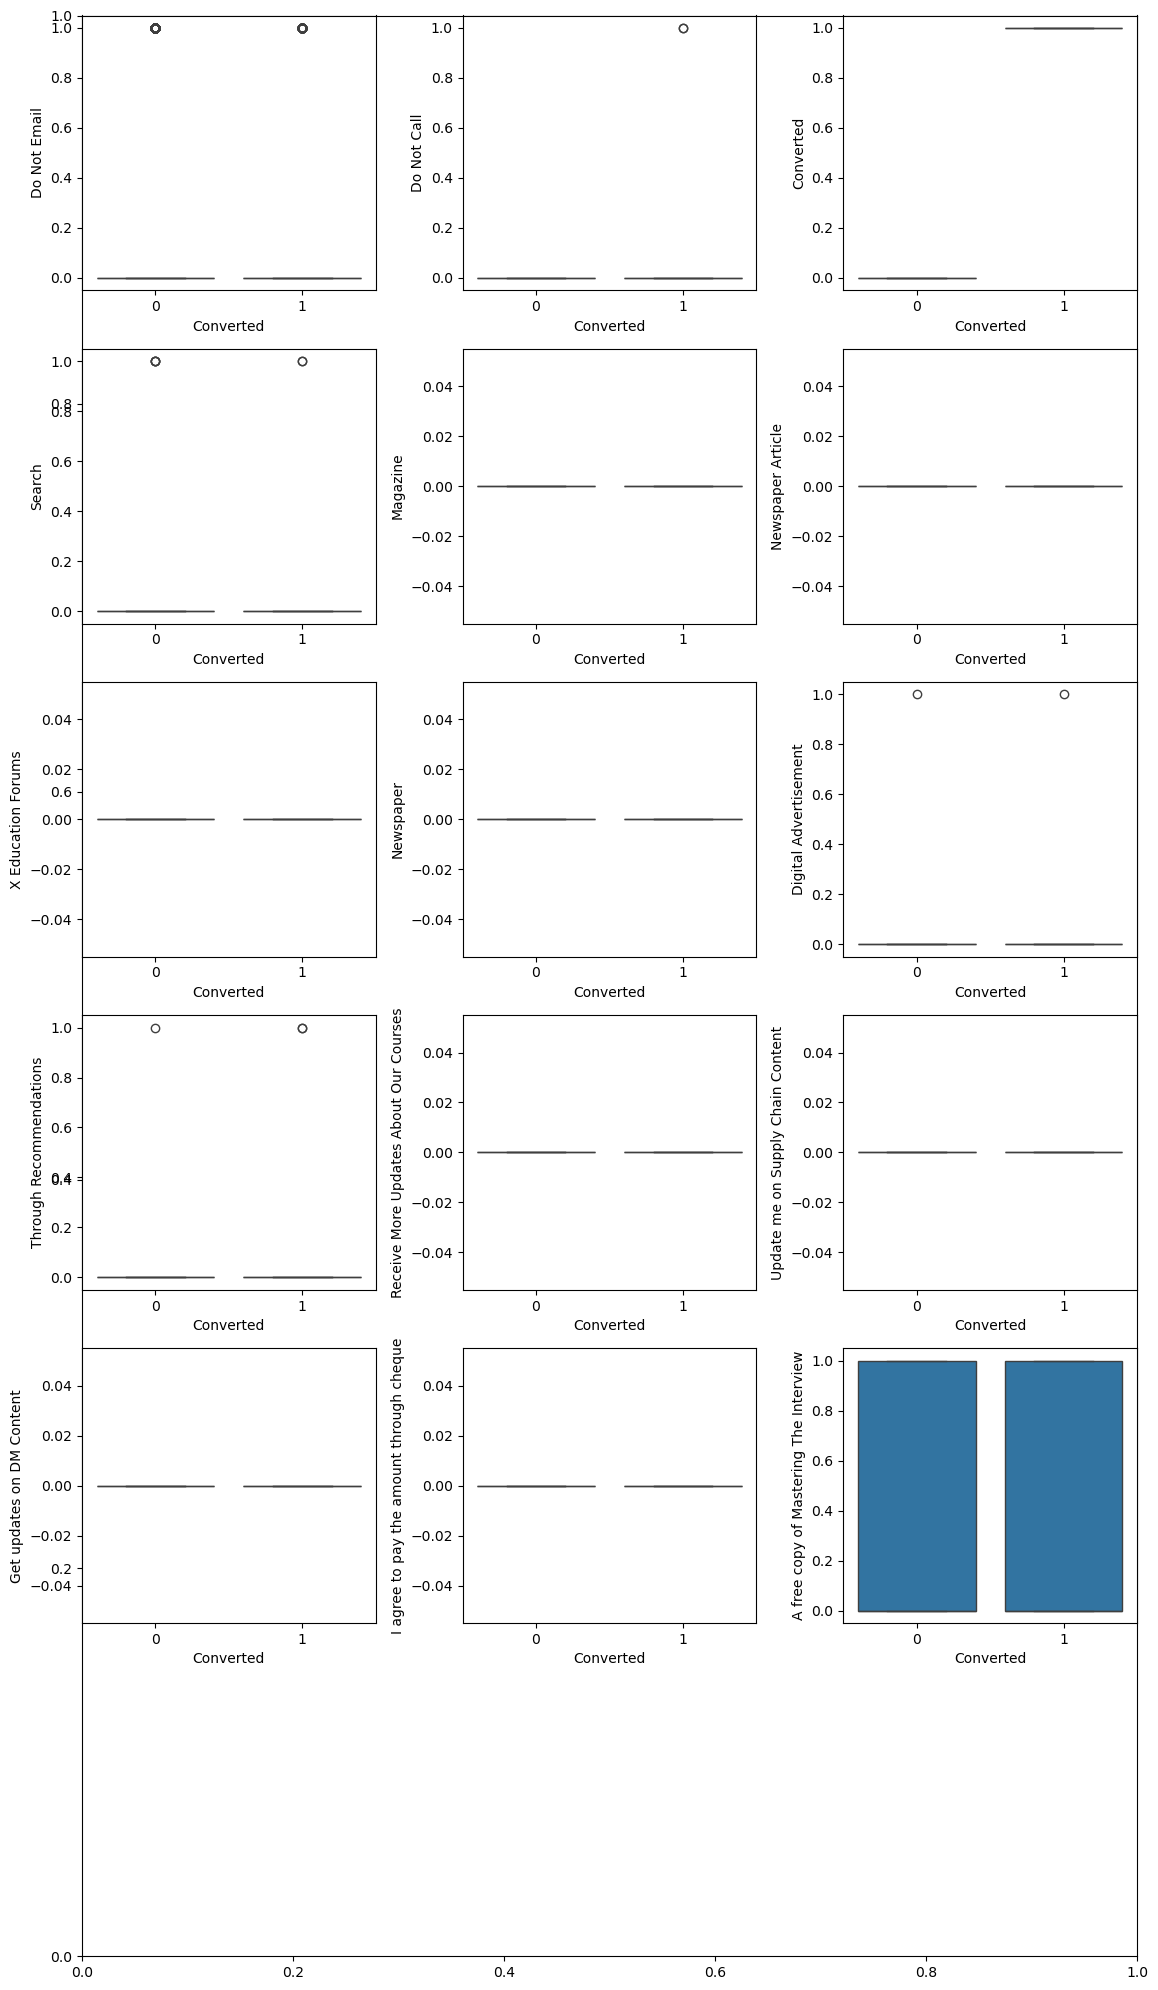

In [62]:
fig = plt.subplots(figsize=(12,20))
for i, feature in enumerate(num_cols):
    plt.subplot(6,3,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.boxplot(y=feature,x='Converted',data=df)
    plt.tight_layout()

In [63]:
float_cols = df.select_dtypes(include='float64')
float_cols.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

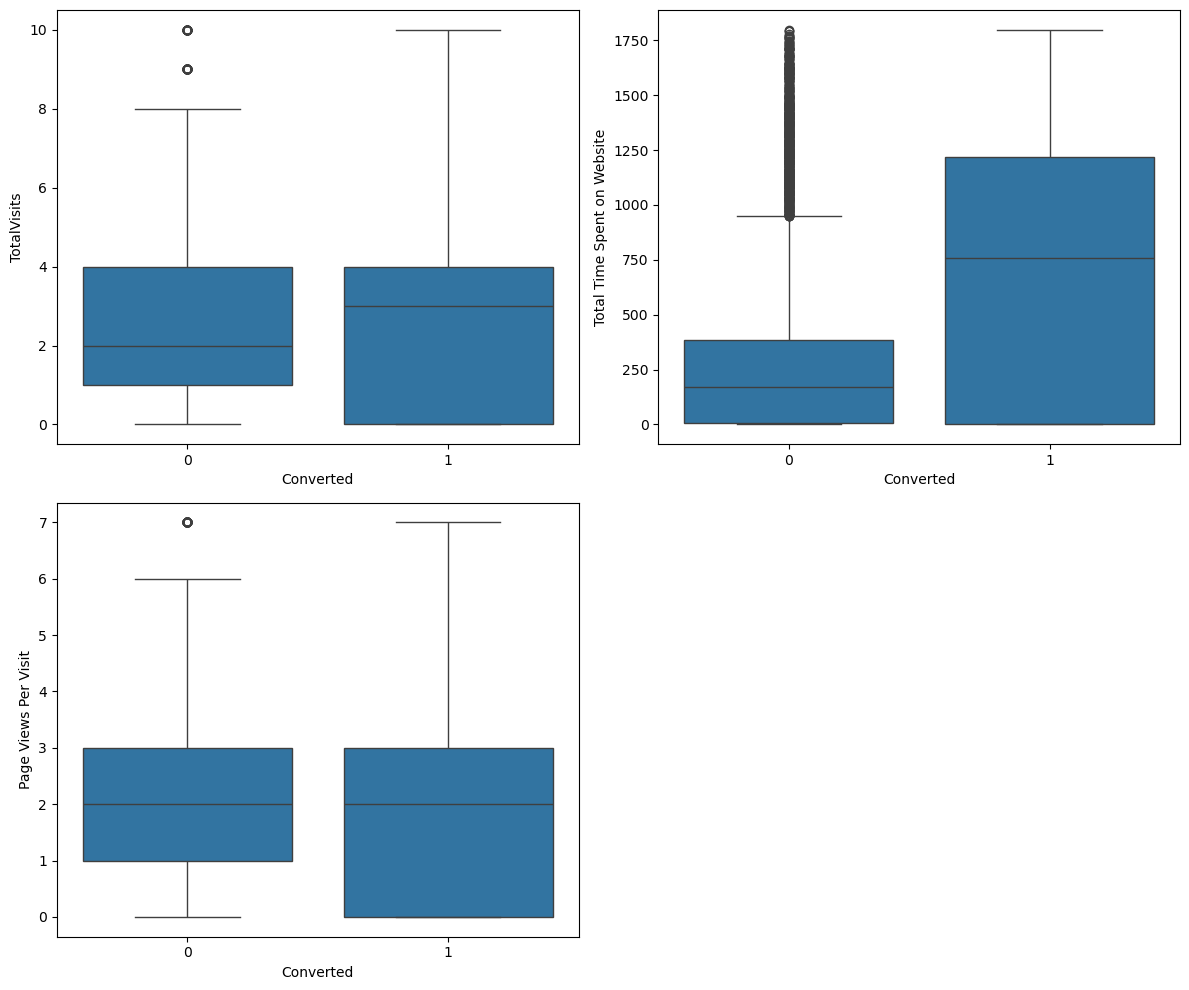

In [64]:
fig = plt.subplots(figsize=(12,10))
plt.axis('off')
for i, feature in enumerate(float_cols):
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(hspace=2.0)
    sns.boxplot(y=feature,x='Converted',data=df)
    plt.tight_layout()

- From the 'Total Visits' and 'Page Views per Visit', there is no information to conclude
- From 'Total Time Spend on Website' gives good information that the persons who intended to spend more time on website can have a better possibility of conversion

In [65]:
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

#### Categorical Columns - Bivariate Analysis with Target Column

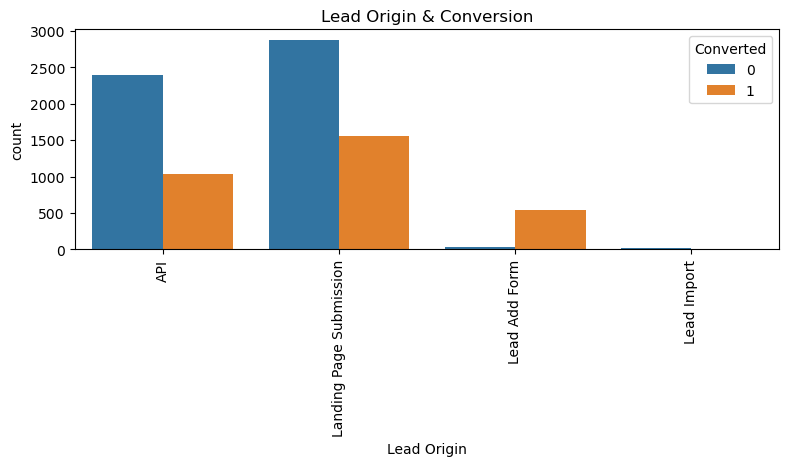

In [66]:

# 'Lead Origin' column
plt.figure(figsize=(20,20))
plt.subplot(6,2,1)
sns.countplot(data=df, x = 'Lead Origin', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('Lead Origin & Conversion')
plt.show()

- This column conveys no valid information

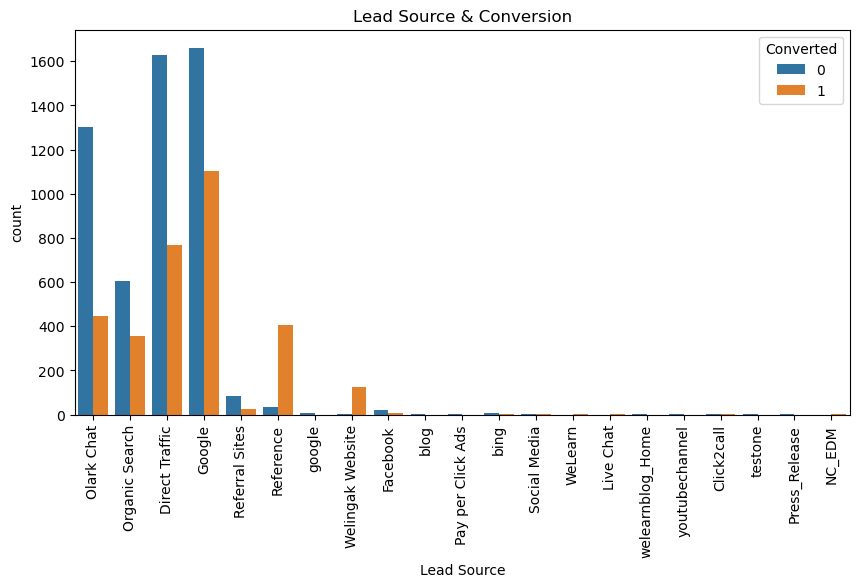

In [62]:
# 'Lead Source'
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'Lead Source', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('Lead Source & Conversion')
plt.show()

In [67]:
other_sites = ['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM']
df['Lead Source']=df['Lead Source'].apply(lambda x: 'other_sites' if x in other_sites else x)
df['Lead Source'].value_counts()

Lead Source
Google              2698
Direct Traffic      2347
Olark Chat          1740
Organic Search       951
Reference            440
Welingak Website     128
Referral Sites       104
Facebook              30
other_sites           21
google                 5
Name: count, dtype: int64

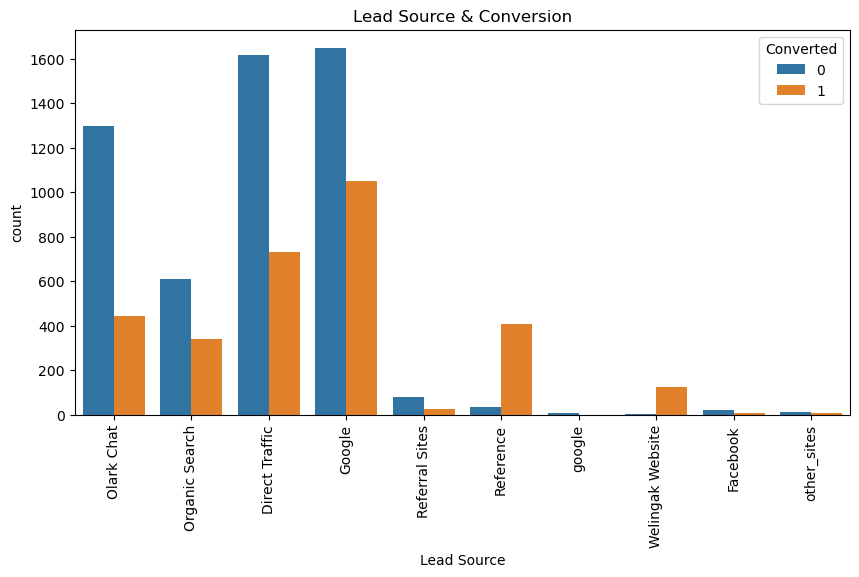

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'Lead Source', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('Lead Source & Conversion')
plt.show()

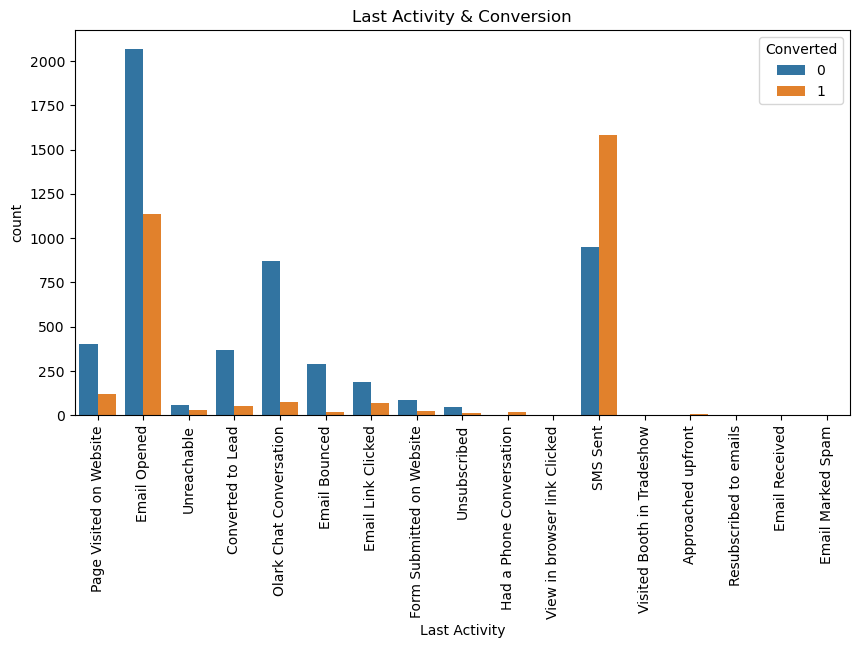

In [69]:
# 'Last Activity'
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'Last Activity', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('Last Activity & Conversion')
plt.show()

In [70]:
[i for i in df['Last Activity'].unique()]

['Page Visited on Website',
 'Email Opened',
 'Unreachable',
 'Converted to Lead',
 'Olark Chat Conversation',
 'Email Bounced',
 'Email Link Clicked',
 'Form Submitted on Website',
 'Unsubscribed',
 'Had a Phone Conversation',
 'View in browser link Clicked',
 'SMS Sent',
 'Visited Booth in Tradeshow',
 'Approached upfront',
 'Resubscribed to emails',
 'Email Received',
 'Email Marked Spam']

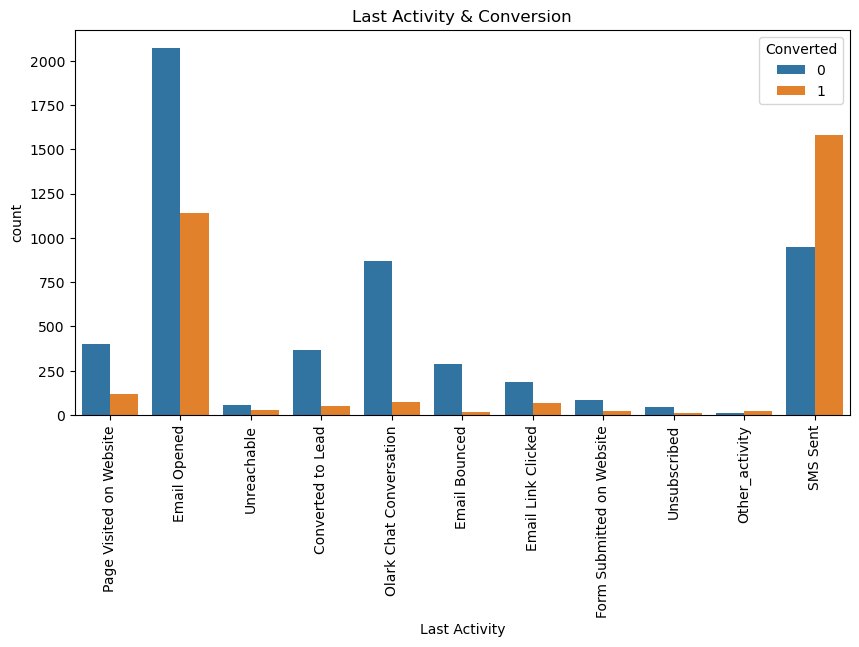

In [71]:
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Other_activity')
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'Last Activity', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('Last Activity & Conversion')
plt.show()

- From the diagram there is count wise and proportion wise, SMS_sent  as last activity have a high conversion rate 
- The count of activity that 'Email Opened' is the maximum and have second best conversion count

**We can focus on the people who have the last activity 'Email Opend' by making a call to those leads and try to increase the count of conversion as likely as 'SMS_sent' activist conversion rate**

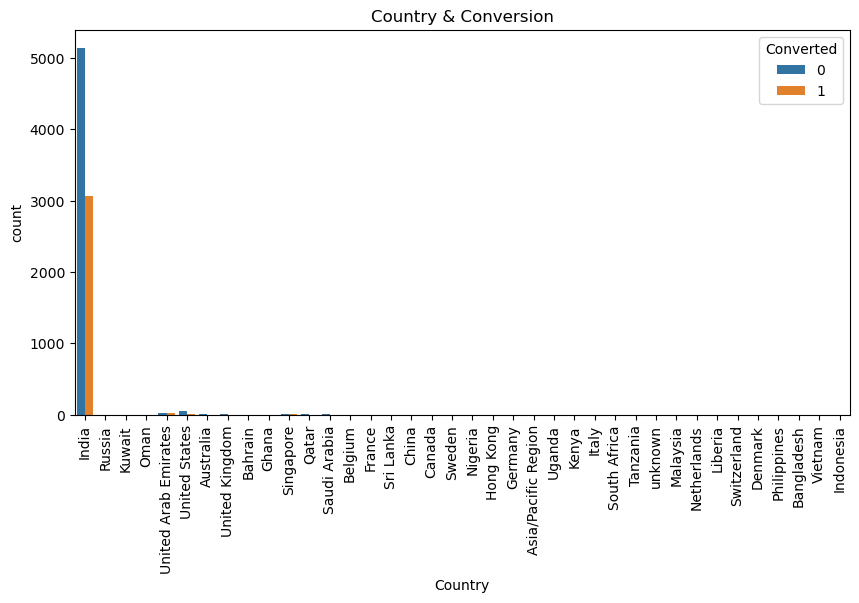

In [72]:
# 'Country',
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'Country', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('Country & Conversion')
plt.show()

In [73]:

countries = [i for i in df['Country'].unique()]
Non_Indian_Asians = [ 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'Bahrain', 
       'Singapore', 'Qatar', 'Saudi Arabia',
       'Sri Lanka', 'China',  'Nigeria',
       'Hong Kong',  'Malaysia',
       'Bangladesh',
       'Vietnam', 'Indonesia']
Non_Asians = [
       'United States', 'Australia', 'United Kingdom',  'Ghana', 'Belgium', 'France','Canada', 'Netherlands', 'Sweden', 'Nigeria','Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 
       'Liberia', 'Switzerland', 'Denmark']

In [74]:
def categorize(country):
    if country in Non_Indian_Asians:
        return "Non_Indian_Asians"
    elif country in Non_Asians:
        return "Non_Asians"
    else:
        return 'India'
df['Country'] = df['Country'].apply(categorize)

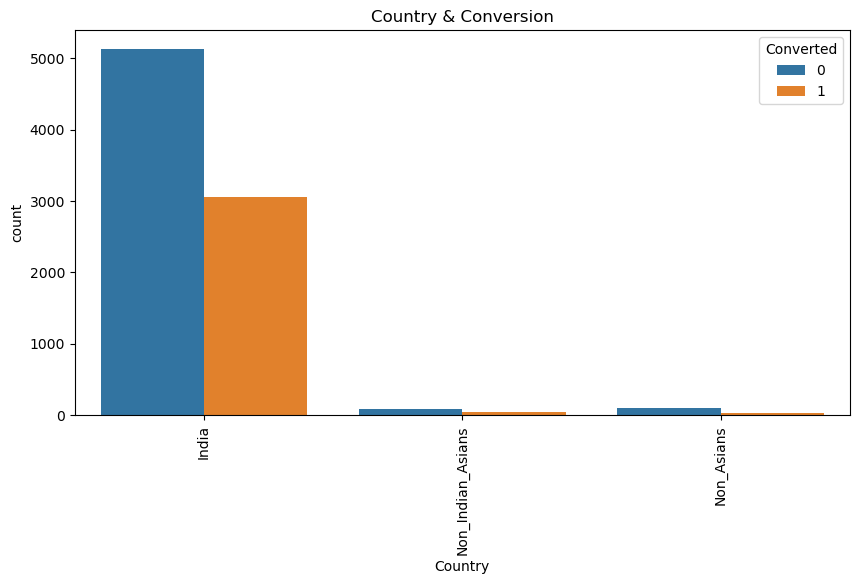

In [75]:
# 'Country',
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'Country', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('Country & Conversion')
plt.show()

- majority of the population is from India, having a good conversion rate. The non_Asians have the lowest conversion rate

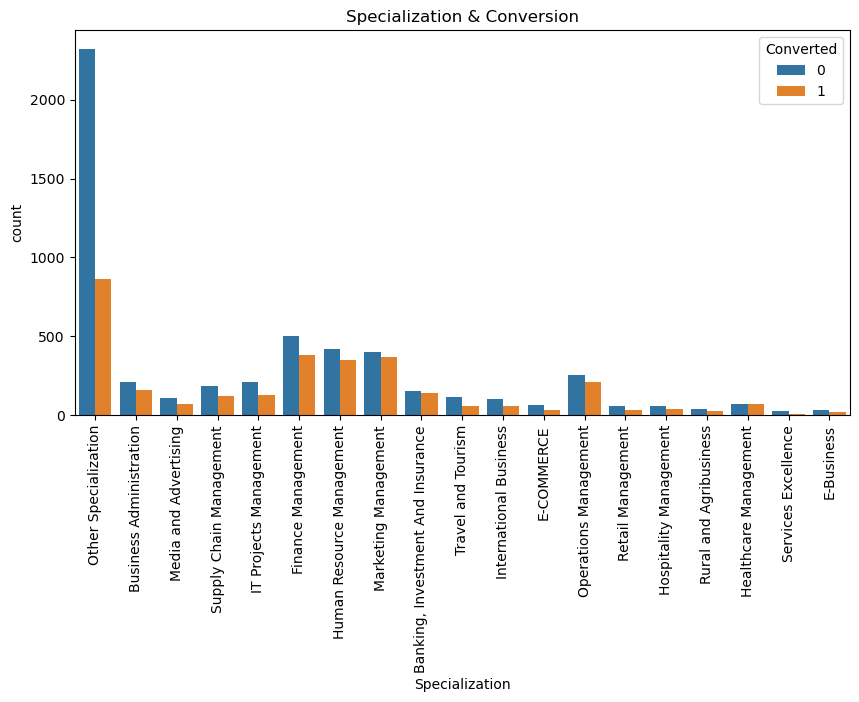

In [76]:
# 'Specialization',
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'Specialization', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('Specialization & Conversion')
plt.show()

- By looking at 'Specialization' column, It is harder to make any conclusion out of it.

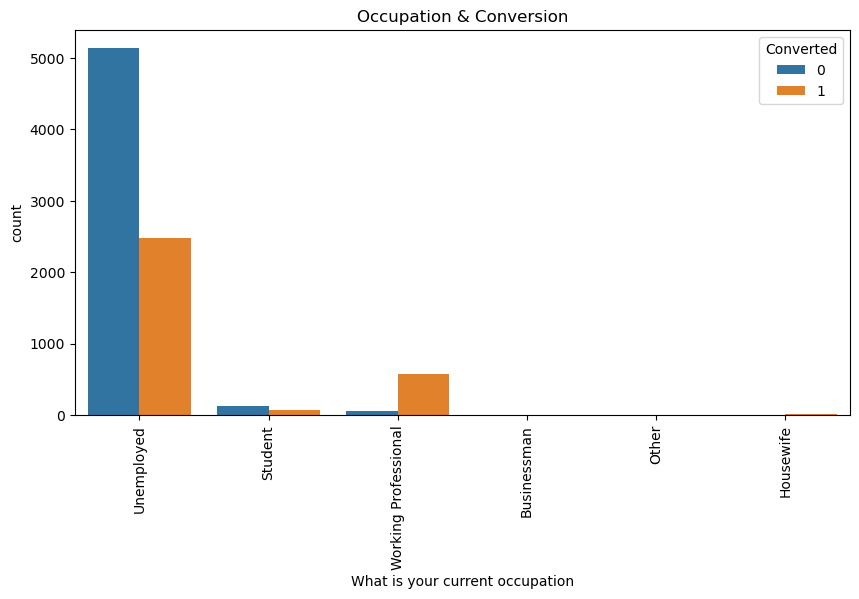

In [77]:
# 'What is your current occupation',
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'What is your current occupation', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('Occupation & Conversion')
plt.show()

- Working professionals have a high rate of conversion
- While unemployed persons have the highest number of conversion

In [78]:
# now we can convert 'other' category into current occupation 
df['What is your current occupation']= df['What is your current occupation'].replace('Other', 'Other_Occupation')

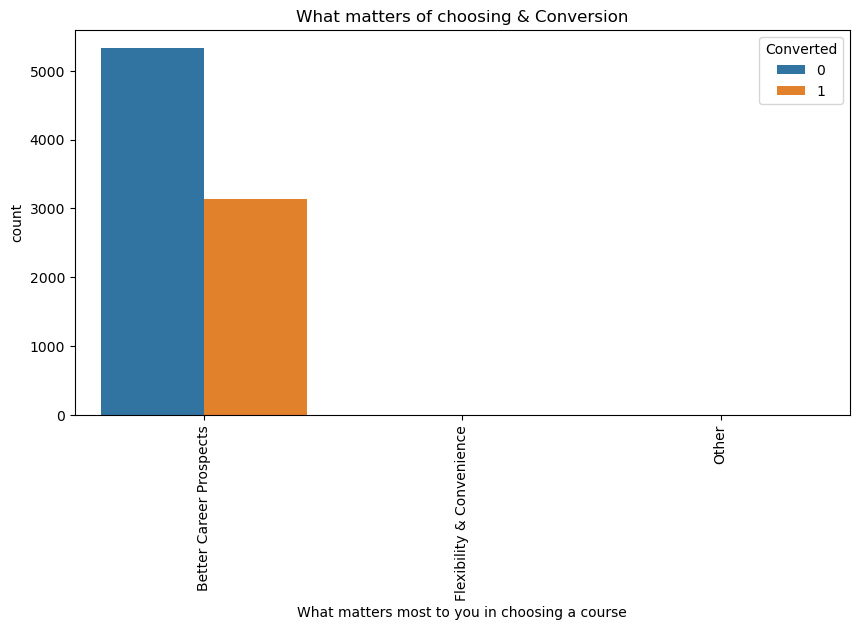

In [79]:
# 'What matters most to you in choosing a course',
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'What matters most to you in choosing a course', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('What matters of choosing & Conversion')
plt.show()

- persons who is looking for better carrier prospects is most likely to be converted

In [80]:
# 'Tags',
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'Tags', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('Tags & Conversion')
plt.show()

- The persons who 'Will revert after reading the email', has high number and a better rate of conversion
- The persons taged as 'Lost to EINS' and 'Closed by Horizzon' has high rate of conversion
- persons taged as 'Busy' also have a better rate of conversion

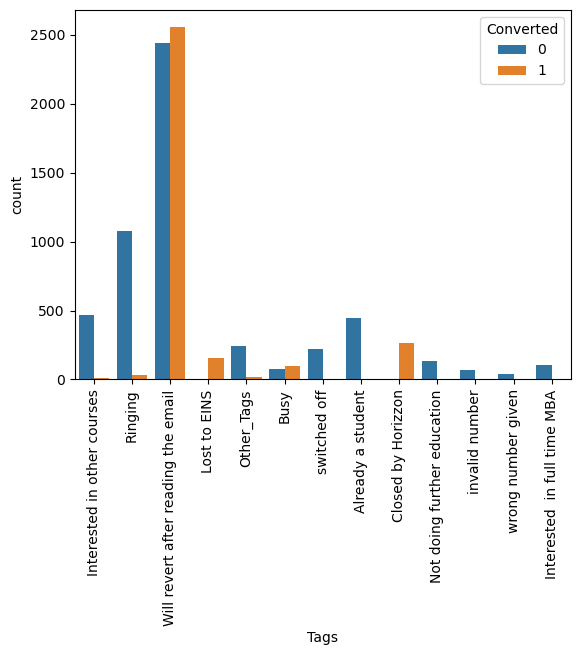

In [81]:
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP','in touch with EINS','Diploma holder (Not Eligible)','Approached upfront', 'Graduation in progress', 'number not provided',
'opp hangup', 'Still Thinking', 'Lost to Others', 'Shall take in the next coming month', 'Lateral student', 'Interested in Next batch', 'Recognition issue (DEC approval)', 'Want to take admission but has financial problems', 'University not recognized'], 'Other_Tags')
sns.countplot(x='Tags', hue='Converted', data = df)
plt.xticks(rotation = 90)
plt.show()

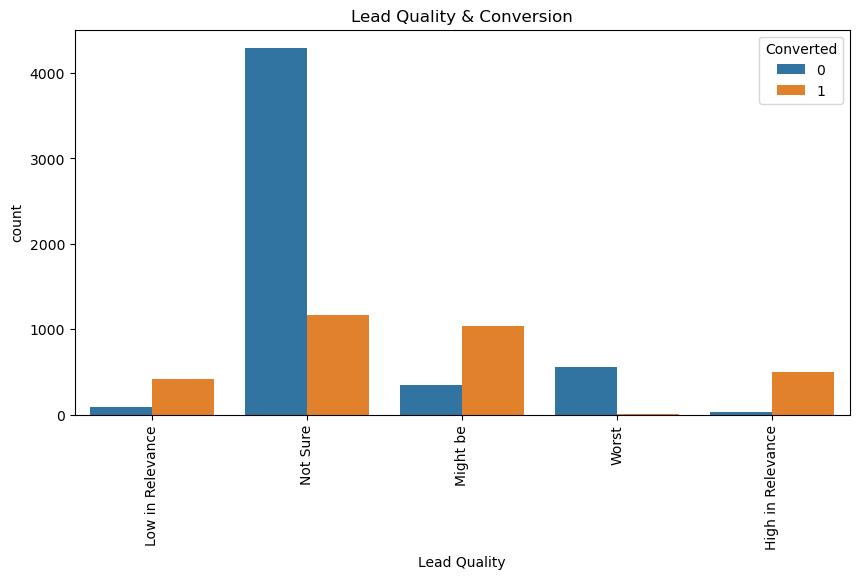

In [82]:
# 'Lead Quality',
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'Lead Quality', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('Lead Quality & Conversion')
plt.show()

- In the 'Lead Quality' Categorization, people  categorized as 'Might be' and 'High in Relevance' have high level of conversion
- people categorized as 'Not sure' having most number of conversion, if the management boost the confused persons who categorized as 'Not Sure' can be converted

In [83]:
# 'City',
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'City', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('City & Conversion')
plt.show()

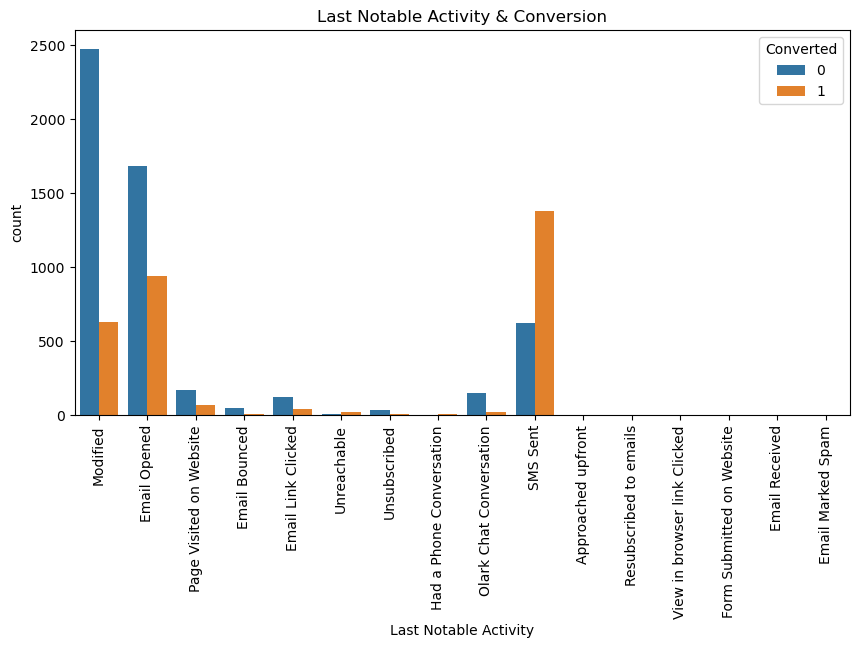

In [84]:
# 'Last Notable Activity'
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'Last Notable Activity', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('Last Notable Activity & Conversion')
plt.show()

In [95]:
value_counts = df['Last Notable Activity'].value_counts(ascending=False)
filtered = value_counts[value_counts<10]
list_filtered = [i for i in filtered.index]
list_filtered

['Approached upfront',
 'Resubscribed to emails',
 'View in browser link Clicked',
 'Form Submitted on Website',
 'Email Received',
 'Email Marked Spam']

In [98]:
for i in list_filtered:
    df['Last Notable Activity']=df['Last Notable Activity'].replace(list_filtered,  'Other_activity')

In [99]:
df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                    3109
Email Opened                2630
SMS Sent                    2005
Page Visited on Website      237
Olark Chat Conversation      174
Email Link Clicked           162
Email Bounced                 58
Unsubscribed                  43
Unreachable                   30
Had a Phone Conversation      10
Other_activity                 6
Name: count, dtype: int64

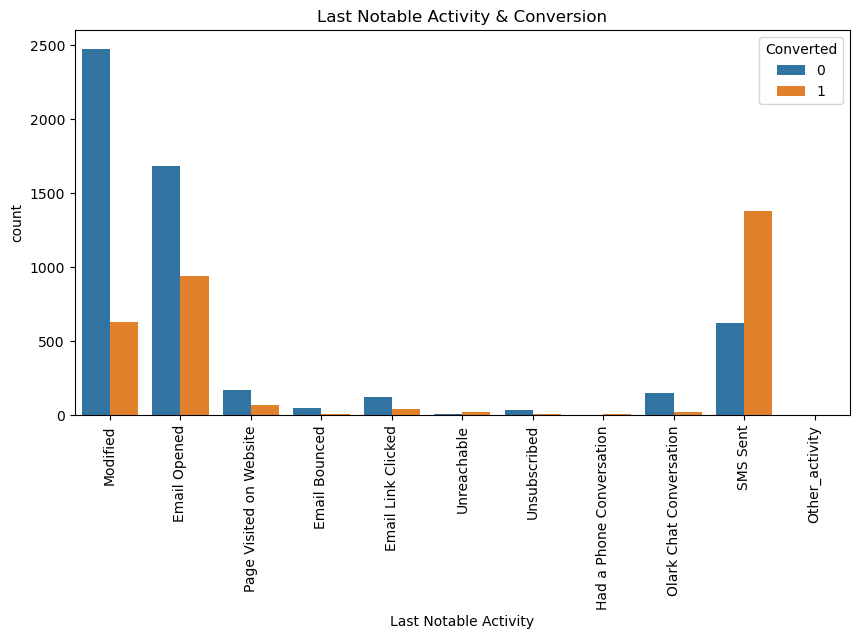

In [100]:
# 'Last Notable Activity'
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'Last Notable Activity', hue = df['Converted'])
plt.xticks(rotation = 90)
plt.title('Last Notable Activity & Conversion')
plt.show()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8464 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8464 non-null   object 
 1   Lead Source                                    8464 non-null   object 
 2   Do Not Email                                   8464 non-null   int64  
 3   Do Not Call                                    8464 non-null   int64  
 4   Converted                                      8464 non-null   int64  
 5   TotalVisits                                    8464 non-null   float64
 6   Total Time Spent on Website                    8464 non-null   float64
 7   Page Views Per Visit                           8464 non-null   float64
 8   Last Activity                                  8464 non-null   object 
 9   Country                                        8464 non-n

In [106]:
[i for i in df.select_dtypes('float64')]


['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [107]:
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

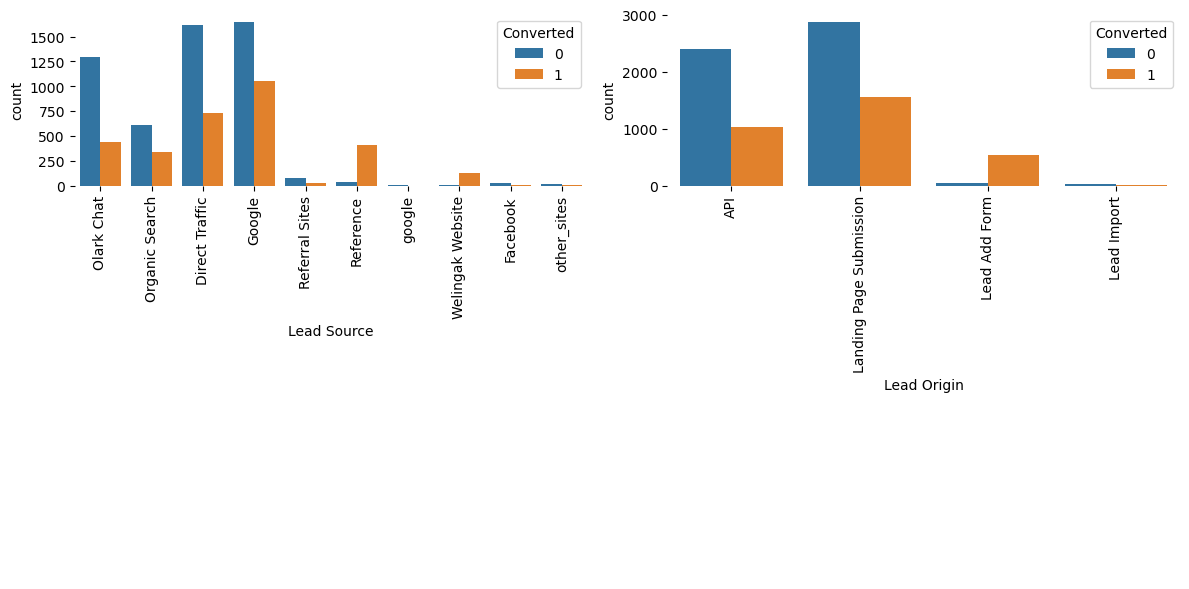

In [108]:
fig = plt.subplots(figsize=(12,6))
plt.axis("off")

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(2,2,i+1, in_layout=False)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=df[feature], hue = df["Converted"])
    plt.xticks(rotation = 90)
    plt.tight_layout()
    sns.despine(left=True, bottom=True, trim= True)
plt.show()

In [109]:
df['Lead Source']= df['Lead Source'].replace('google','Google')

- since the 'Lead Source' column has lot of irrelevant sites which we placed as 'other_sites' 

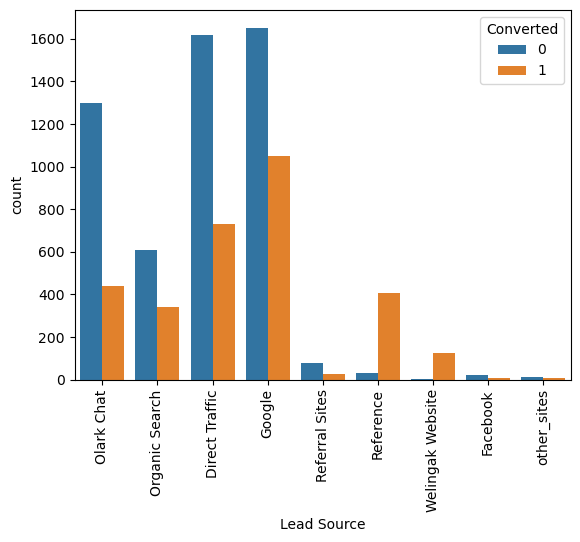

In [110]:
# plotting the 'Lead Source' again
sns.countplot(x=df['Lead Source'], hue = df["Converted"])
plt.xticks(rotation = 90)
plt.show()

#### Observation
- The count of leads from Google and Direct Traffic has at the highest 
- The rate of conversion from 'reference' as well as 'welingak Website' is the maximum

<Axes: >

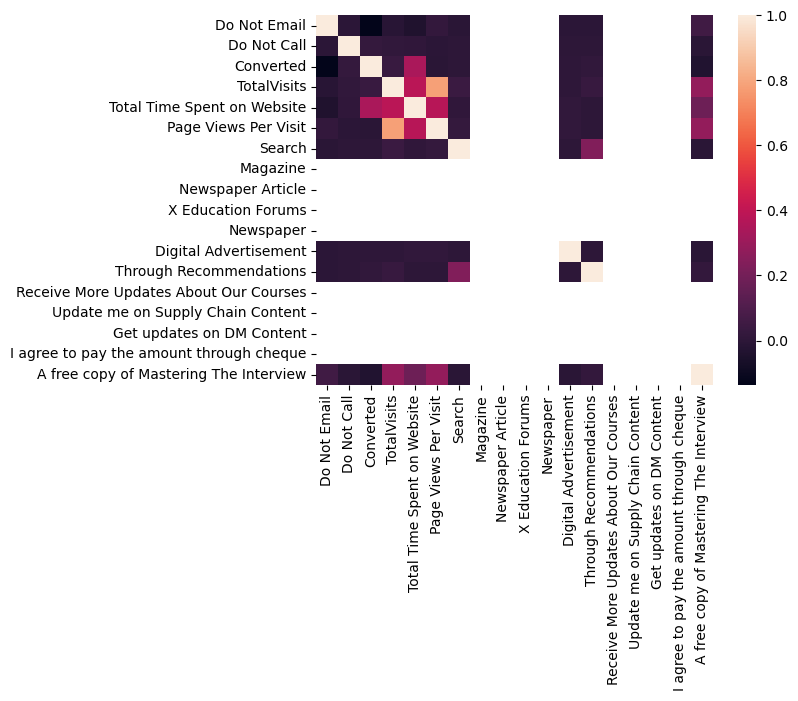

In [111]:
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr())

#### Dropping unncecessary Columns

In [112]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [115]:
binary_cols = [i for i in df.select_dtypes(['int64','object']).columns]
for i in binary_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*60)

Lead Origin
Landing Page Submission    0.523393
API                        0.405128
Lead Add Form              0.068053
Lead Import                0.003426
Name: proportion, dtype: float64
************************************************************
Lead Source
Google              0.319353
Direct Traffic      0.277292
Olark Chat          0.205577
Organic Search      0.112358
Reference           0.051985
Welingak Website    0.015123
Referral Sites      0.012287
Facebook            0.003544
other_sites         0.002481
Name: proportion, dtype: float64
************************************************************
Do Not Email
0    0.922495
1    0.077505
Name: proportion, dtype: float64
************************************************************
Do Not Call
0    0.999764
1    0.000236
Name: proportion, dtype: float64
************************************************************
Converted
0    0.629371
1    0.370629
Name: proportion, dtype: float64
*******************************************

In [116]:
df = df.drop(['What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
              'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
              'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Country', 'Do Not Call'],axis=1)
df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                          0.0                   0.0   
1          5.0                        674.0                   2.5   
2          2.0                       1532.0                   2.0   
3          1.0                        305.0                   1.0   
4          2.0                       1428.0                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website     Other Specialization   
1             Email Opened     Other Specialization   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead     Other Specialization   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       Lead Quality  Update me on Supply Chain Content    City  \
0  Low in Relevance                                  0  Mumbai   
1          Not Sure                                  0  Mumbai   
2          Might be                                  0  Mumbai   
3          Not Sure                                  0  Mumbai   
4          Might be                                  0  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

# Dummy Variable Creation

In [117]:
cat_cols = [i for i in df.select_dtypes(include='object')]
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [118]:
df1 = pd.concat([df.drop(columns=cat_cols), pd.get_dummies(df[cat_cols], drop_first=True,dtype=int)], axis=1)

In [120]:
df1.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Update me on Supply Chain Content',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_other_sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Speciali

In [121]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()
#for i in df.select_dtypes(include='object'):
   # df1[i] =label_encoder.fit_transform(df[i])

## Train-Test Split

In [122]:
x = df1.drop(columns=['Converted'])
y= df1['Converted']

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=10)

### Scaling of continuous data

In [124]:
cont_col = [i for i in df.select_dtypes(include='float64').columns]
cont_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler=StandardScaler()
x_train[cont_col]=scaler.fit_transform(x_train[cont_col])
x_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1369             0    -0.330926                     1.286203   
5077             0     1.793022                     0.969424   
2428             0    -0.330926                    -0.418186   
2652             0     0.093864                     1.842024   
5430             0     1.368232                     1.459168   

      Page Views Per Visit  Update me on Supply Chain Content  \
1369             -0.074060                                  0   
5077              0.789525                                  0   
2428             -0.074060                                  0   
2652              0.501664                                  0   
5430              0.501664                                  0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1369                                    0                          0   
5077                                    1                          0   
2428                                    0                          0   
2652                                    1                          0   
5430                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
1369                        0                     0                   1   
5077                        0                     0                   1   
2428                        0                     0                   1   
2652                        0                     0                   0   
5430                        0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  \
1369                       0                           0   
5077                       0                           0   
2428                       0                           0   
2652                       0                           1   
5430                       0                           0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1369                      0                           0   
5077                      0                           0   
2428                      0                           0   
2652                      0                           0   
5430                      0                           0   

      Lead Source_Welingak Website  Lead Source_other_sites  \
1369                             0                        0   
5077                             0                        0   
2428                             0                        0   
2652                             0                        0   
5430                             0                        0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
1369                            0                                 0   
5077                            0                                 0   
2428                            0                                 1   
2652                            0                                 0   
5430                            0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
1369                           0                                        0   
5077                           0                                        0   
2428                           0                                        0   
2652                           0                                        0   
5430                           0                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other_activity  \
1369                                      0                             0   
5077                                      0                             0   
2428                                      0                             0   
2652                                      0          

In [127]:
## conversion rate
sum(df1['Converted'])/len(df1['Converted'].index)*100

37.06285444234405

In [128]:
df1.shape

(8464, 81)

## Heat Map

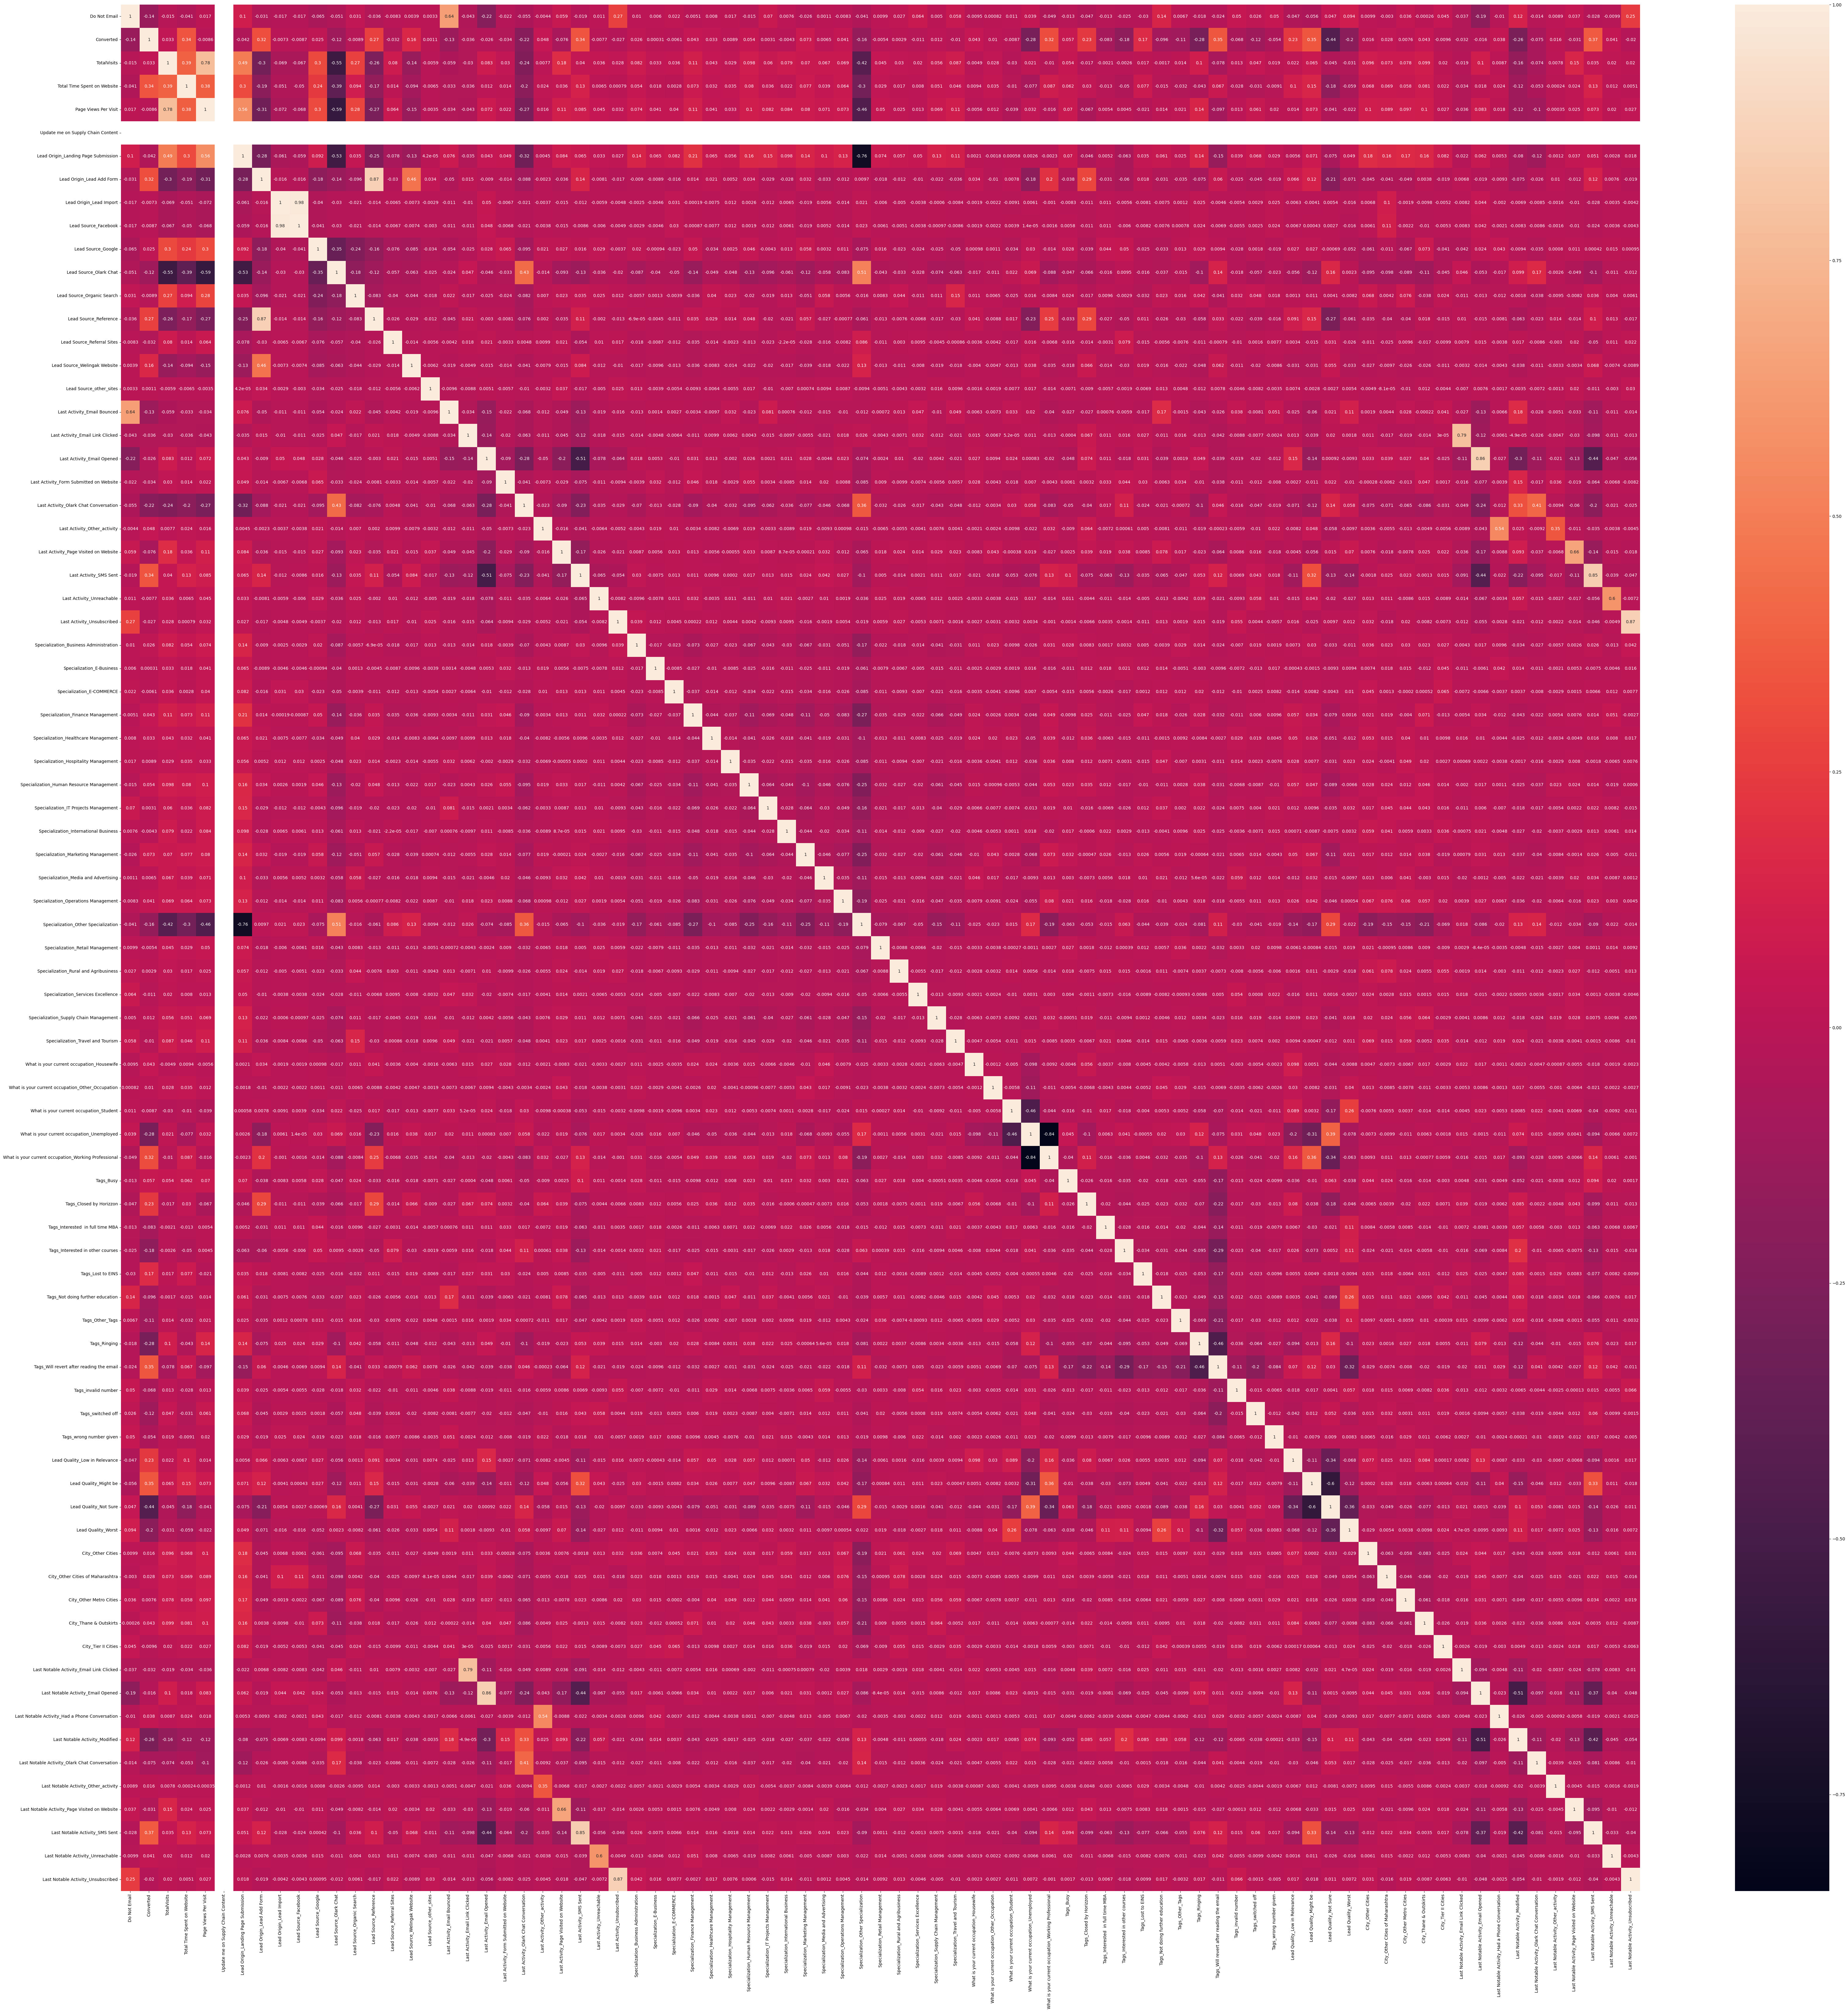

In [129]:
plt.figure(figsize=(80, 80)) 
sns.heatmap(df1.corr(),annot=True)
plt.show()

- Here, 'Last Activity' and 'Last Notable Activity' were highly correlated
- Again, 'X Education Forumns' and 'New Paper Article' were highly correlated
- 'Page Views Per visits' and 'Total Visists' were correlated

In [130]:
#[i for i in df1.columns]

In [131]:
conv_corr = df1.corr()
mask = np.triu(np.ones(conv_corr.shape), k=1).astype(bool)

# Apply the mask and unstack the correlations
conv_corr_unstacked = conv_corr.where(mask).stack()

# Sort the correlations and display the top 10
top_10_corr = conv_corr_unstacked.sort_values(ascending=False).head(10)
print(top_10_corr)

Lead Origin_Lead Import                Lead Source_Facebook                             0.983134
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.867832
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866569
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.859419
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.852792
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.790979
TotalVisits                            Page Views Per Visit                             0.781777
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.664757
Do Not Email                           Last Activity_Email Bounced                      0.638603
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.595698
dtype: float64


In [132]:
corr_colms = ['Lead Origin_Lead Import','Last Notable Activity_Unsubscribed','Lead Origin_Lead Add Form','Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent',
              'Last Notable Activity_Email Link Clicked','Last Notable Activity_Page Visited on Website','Last Activity_Email Bounced','Page Views Per Visit']

In [133]:
df1.drop(columns = corr_colms,inplace=True)

In [134]:
# drop the highly corrleated columns from the x_train, and x_test

In [135]:
x_train.drop(columns = corr_colms,inplace=True,axis=1)
x_test.drop(columns = corr_colms,inplace=True,axis=1)

## Model Building

In [136]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', C=0.1) 

In [137]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, x, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", scores.mean())

Cross-validated accuracy: 0.8983913737416899


In [138]:
import statsmodels.api as sm

In [139]:
x_train_sm = sm.add_constant(x_train)

In [140]:
logr1 = sm.GLM(pd.DataFrame(y_train),x_train_sm,family=sm.families.Binomial())
res1 = logr1.fit()
print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5924
Model:                            GLM   Df Residuals:                     5853
Model Family:                Binomial   Df Model:                           70
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 20 Dec 2024   Deviance:                       57841.
Time:                        11:52:29   Pearson chi2:                 2.83e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [141]:
## Feature Selection using RFE 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()


In [142]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select= 15)
rfe= rfe.fit(x_train,y_train)

In [143]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False])

In [144]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', False, 4),
 ('TotalVisits', False, 55),
 ('Total Time Spent on Website', False, 7),
 ('Update me on Supply Chain Content', False, 57),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 56),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', False, 54),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_other_sites', False, 21),
 ('Last Activity_Email Link Clicked', False, 18),
 ('Last Activity_Email Opened', False, 39),
 ('Last Activity_Form Submitted on Website', False, 22),
 ('Last Activity_Olark Chat Conversation', False, 17),
 ('Last Activity_Other_activity', False, 10),
 ('Last Activity_Page Visited on Website', False, 38),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 28),
 ('Last Activity_Unsubscribed', False, 50),
 ('Specialization_Business Administrati

In [145]:
col_rfe1 = [i for i in x_train.columns[rfe.support_]]
col_rfe1

['Lead Source_Welingak Website',
 'Last Activity_SMS Sent',
 'What is your current occupation_Working Professional',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_invalid number',
 'Tags_switched off',
 'Tags_wrong number given',
 'Lead Quality_Not Sure',
 'Lead Quality_Worst',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation']

### Model 2

In [146]:
x_train_sm = sm.add_constant(x_train[col_rfe1])
logr2 = sm.GLM(pd.DataFrame(y_train),x_train_sm,family=sm.families.Binomial())
res2 = logr2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5924
Model:                            GLM   Df Residuals:                     5908
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1442.0
Date:                Fri, 20 Dec 2024   Deviance:                       2884.0
Time:                        11:52:58   Pearson chi2:                 2.93e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5641
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [147]:
#col_rfe2 = res2.params.index.drop(['const','Tags_Ringing'])
col_rfe2 = res2.params.index.drop(['const','Tags_wrong number given','Tags_invalid number'])

In [148]:
col_rfe2 = [i for i in col_rfe2]


### Model 3

In [149]:
x_train_sm = sm.add_constant(x_train[col_rfe2])
logr3 = sm.GLM(pd.DataFrame(y_train),x_train_sm,family=sm.families.Binomial())
res3 = logr3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5924
Model:                            GLM   Df Residuals:                     5910
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.8
Date:                Fri, 20 Dec 2024   Deviance:                       2895.7
Time:                        11:55:14   Pearson chi2:                 2.93e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5633
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [150]:
# check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
vif = pd.DataFrame()
vif['features'] = x_train[col_rfe2].columns
vif['VIF'] = [variance_inflation_factor(x_train[col_rfe2].values,i) for i in range(x_train[col_rfe2].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)

features   VIF
9                               Lead Quality_Not Sure  3.23
7            Tags_Will revert after reading the email  2.91
11                     Last Notable Activity_Modified  1.67
1                              Last Activity_SMS Sent  1.61
6                                        Tags_Ringing  1.54
2   What is your current occupation_Working Profes...  1.23
3                                           Tags_Busy  1.12
8                                   Tags_switched off  1.11
10                                 Lead Quality_Worst  1.10
4                             Tags_Closed by Horizzon  1.09
5                                   Tags_Lost to EINS  1.06
12      Last Notable Activity_Olark Chat Conversation  1.06
0                        Lead Source_Welingak Website  1.05

In [152]:
col_rfe2

['Lead Source_Welingak Website',
 'Last Activity_SMS Sent',
 'What is your current occupation_Working Professional',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_switched off',
 'Lead Quality_Not Sure',
 'Lead Quality_Worst',
 'Last Notable Activity_Modified',
 'Last Notable Activity_Olark Chat Conversation']

### prediction

In [153]:
y_train_pred = res3.predict(x_train_sm).values.reshape(-1)
y_train_pred

array([6.11088190e-02, 9.86905821e-01, 6.11088190e-02, ...,
       9.13362920e-01, 9.13362920e-01, 9.55795123e-04])

In [154]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final['Lead_Score'] = y_train_pred_final['Conversion_Prob']*100
y_train_pred_final.head()

Converted  Conversion_Prob  CustID  Lead_Score
0          1         0.061109    1369    6.110882
1          1         0.986906    5077   98.690582
2          0         0.061109    2428    6.110882
3          1         0.703880    2652   70.388031
4          1         0.703880    5430   70.388031

In [155]:
y_train_pred_final['Converted_Pred'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  CustID  Lead_Score  Converted_Pred
0          1         0.061109    1369    6.110882               0
1          1         0.986906    5077   98.690582               1
2          0         0.061109    2428    6.110882               0
3          1         0.703880    2652   70.388031               1
4          1         0.703880    5430   70.388031               1

### Confusion Matrix

In [156]:
from sklearn import metrics

In [157]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Converted_Pred)
confusion

array([[3576,  160],
       [ 306, 1882]], dtype=int64)

In [158]:
# accuracy score
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Converted_Pred)

0.9213369345037137

In [159]:
# Percision
metrics.precision_score(y_train_pred_final.Converted,y_train_pred_final.Converted_Pred)

0.921645445641528

In [160]:
#confusion metrix
TN = confusion[0,0]  # True Negative
FN = confusion[1,0]  # False Negative
FP = confusion[0,1]   # False Positive
TP = confusion[1,1]    # True positive

In [161]:
print("Sensitivity: " ,TP/float(TP+FN))
print("Specificity: " ,TN/float(TN+FP))
print("False Positive Rate: ",FP/float(FP+TN))
print("Positive Predictive Value: ",TP/float(TP+FP))
print("Negative Predictive Value: ", TN/float(TN+FN))

Sensitivity:  0.8601462522851919
Specificity:  0.9571734475374732
False Positive Rate:  0.042826552462526764
Positive Predictive Value:  0.921645445641528
Negative Predictive Value:  0.9211746522411128


## Plotting ROC Curve

#### ROC curve demonstrates several things:
a. It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
b. The closer the curve follows the left-hand border and then the top boarder of the ROC space, the more accurate the test.
c. the closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [162]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)'% auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Position Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [163]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Pred,drop_intermediate=False)

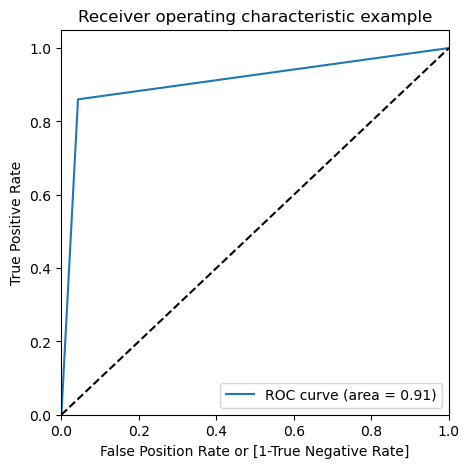

In [164]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Converted_Pred)

## Finding Optimal Cutoff Point

- Optimal cutoff probability is that prob whre we get balanced sensitivity and specificity

In [165]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  CustID  Lead_Score  Converted_Pred  0.0  0.1  \
0          1         0.061109    1369    6.110882               0    1    0   
1          1         0.986906    5077   98.690582               1    1    1   
2          0         0.061109    2428    6.110882               0    1    0   
3          1         0.703880    2652   70.388031               1    1    1   
4          1         0.703880    5430   70.388031               1    1    1   

   0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0    0  
1    1    1    1    1    1    1    1    1  
2    0    0    0    0    0    0    0    0  
3    1    1    1    1    1    1    0    0  
4    1    1    1    1    1    1    0    0

In [166]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity =cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i,accuracy,sensitivity,specificity]

print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.369345     1.000000     0.000000
0.1   0.1  0.801485     0.961609     0.707709
0.2   0.2  0.811276     0.959324     0.724572
0.3   0.3  0.904625     0.883455     0.917024
0.4   0.4  0.921337     0.860146     0.957173
0.5   0.5  0.921337     0.860146     0.957173
0.6   0.6  0.921675     0.860146     0.957709
0.7   0.7  0.910196     0.820841     0.962527
0.8   0.8  0.865969     0.657221     0.988223
0.9   0.9  0.864787     0.654022     0.988223


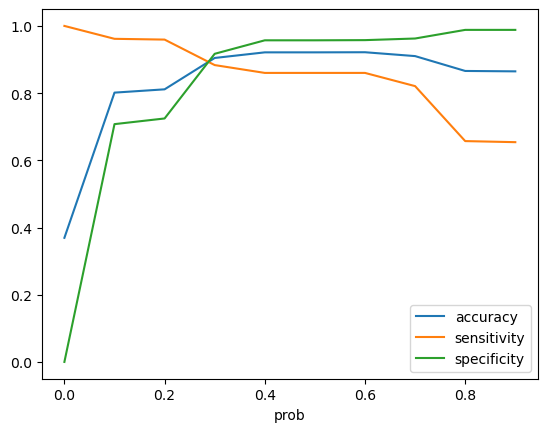

In [167]:
# Let's plot accuracy, sensitivity and specificity for varius probabilities.
cutoff_df.plot.line(x='prob', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

#### From the curve, 0.3 is the optimum cutoff probability

### Precision-Recall Trade Off

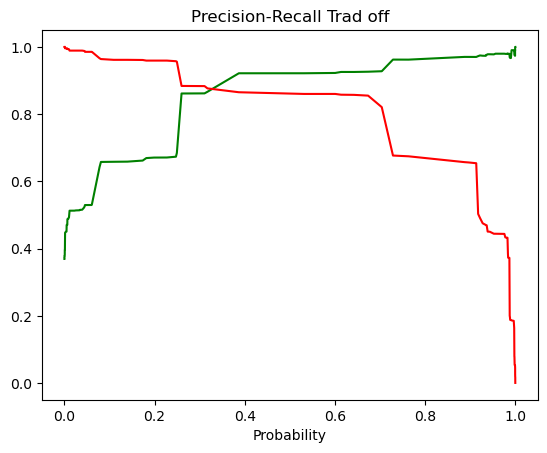

In [168]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_Prob)
plt.plot(thresholds,p[:-1],'g-')
plt.plot(thresholds,r[:-1],'r-')
plt.xlabel('Probability')
plt.title('Precision-Recall Trad off')
plt.show()

In [169]:
y_train_pred_final['Converted_Pred'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x>0.27 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  CustID  Lead_Score  Converted_Pred  0.0  0.1  \
0          1         0.061109    1369    6.110882               0    1    0   
1          1         0.986906    5077   98.690582               1    1    1   
2          0         0.061109    2428    6.110882               0    1    0   
3          1         0.703880    2652   70.388031               1    1    1   
4          1         0.703880    5430   70.388031               1    1    1   

   0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0    0  
1    1    1    1    1    1    1    1    1  
2    0    0    0    0    0    0    0    0  
3    1    1    1    1    1    1    0    0  
4    1    1    1    1    1    1    0    0

In [170]:
## accuracy
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Converted_Pred)

0.9046252532072924

In [171]:
# precision
metrics.precision_score(y_train_pred_final.Converted,y_train_pred_final.Converted_Pred)

0.8617922425323228

In [172]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Converted_Pred)
confusion

array([[3426,  310],
       [ 255, 1933]], dtype=int64)

In [173]:
metrics.recall_score(y_train_pred_final.Converted,y_train_pred_final.Converted_Pred)

0.8834552102376599

In [174]:
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]
TP = confusion[1,1]
print("Sensitivity: " ,TP/float(TP+FN))
print("Specificity: " ,TN/float(TN+FP))
print("False Positive Rate: ",FP/float(FP+TN))
print("Positive Predictive Value: ",TP/float(TP+FP))
print("Negative Predictive Value: ", TN/float(TN+FN))

Sensitivity:  0.8834552102376599
Specificity:  0.9170235546038544
False Positive Rate:  0.08297644539614561
Positive Predictive Value:  0.8617922425323228
Negative Predictive Value:  0.9307253463732681


### Optimum cut off at 0.28

In [317]:
y_train_pred_final['Converted_Pred'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x>0.27 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  CustID  Lead_Score  Converted_Pred  0.0  0.1  \
0          1         0.061109    1369    6.110882               0    1    0   
1          1         0.986906    5077   98.690582               1    1    1   
2          0         0.061109    2428    6.110882               0    1    0   
3          1         0.703880    2652   70.388031               1    1    1   
4          1         0.703880    5430   70.388031               1    1    1   

   0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0    0  
1    1    1    1    1    1    1    1    1  
2    0    0    0    0    0    0    0    0  
3    1    1    1    1    1    1    0    0  
4    1    1    1    1    1    1    0    0

In [318]:
# accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)

0.9046252532072924

In [319]:
# Precision
metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)

0.8617922425323228

In [320]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)
TN = confusion[0,0]
TP = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]
print("sensitivity =", TP/float(TP+FN))
print("specificity =", TN/float(TN+FP))

print("FPR = ", FP/float(FP+TN))
print("recall,TPR = ", TP/float(TP+FN))
print("Positive Predictive Value,Precision:", TP/float(TP+FP))
print("Negative Predictive Value = ", TN/float(TN+FN))



sensitivity = 0.8834552102376599
specificity = 0.9170235546038544
FPR =  0.08297644539614561
recall,TPR =  0.8834552102376599
Positive Predictive Value,Precision: 0.8617922425323228
Negative Predictive Value =  0.9307253463732681


In [321]:
confusion

array([[3426,  310],
       [ 255, 1933]], dtype=int64)

### Optimum Cutoff at 0.38

In [250]:
y_train_pred_final['Converted_Pred'] = y_train_pred_final['Conversion_Prob'].map(lambda x: 1 if x>0.38 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  CustID  Lead_Score  Converted_Pred  0.0  0.1  \
0          1         0.061109    1369    6.110882               0    1    0   
1          1         0.986906    5077   98.690582               1    1    1   
2          0         0.061109    2428    6.110882               0    1    0   
3          1         0.703880    2652   70.388031               1    1    1   
4          1         0.703880    5430   70.388031               1    1    1   

   0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0    0    0    0  
1    1    1    1    1    1    1    1    1  
2    0    0    0    0    0    0    0    0  
3    1    1    1    1    1    1    0    0  
4    1    1    1    1    1    1    0    0

In [251]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)

0.9230249831195139

In [252]:
metrics.precision_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)

0.921616358325219

In [253]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)
TN = confusion[0,0]
TP = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]
print("sensitivity =", TP/float(TP+FN))
print("specificity =", TN/float(TN+FP))

print("FPR = ", FP/float(FP+TN))
print("recall,TPR = ", TP/float(TP+FN))
print("Positive Predictive Value,Precision:", TP/float(TP+FP))
print("Negative Predictive Value = ", TN/float(TN+FN))


sensitivity = 0.8651736745886655
specificity = 0.9569057815845824
FPR =  0.04309421841541756
recall,TPR =  0.8651736745886655
Positive Predictive Value,Precision: 0.921616358325219
Negative Predictive Value =  0.9237726098191215


In [254]:
confusion

array([[3575,  161],
       [ 295, 1893]], dtype=int64)

- The optimal cut off is decided based on the sensitivity and specificity values where it maximizes simultaneously
- the final cut off is 0.28

In [185]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

In [186]:
optimal_threshold

0.386985696156373

## Test Set Results

In [207]:
features = [i for i in res3.params.index]
features.remove('const') 

In [208]:
x_test_sm = sm.add_constant(x_test[features])

In [209]:
res = sm.OLS(pd.DataFrame(y_test),x_test_sm,family=sm.families.Binomial())
log=res.fit()
print(log.summary())

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     291.8
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:04:55   Log-Likelihood:                -595.13
No. Observations:                2540   AIC:                             1218.
Df Residuals:                    2526   BIC:                             1300.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [210]:
print("Training columns:", x_train_sm.columns)
print("Test columns:", x_test_sm.columns)

Training columns: Index(['const', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')
Test columns: Index(['const', 'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')


In [211]:
y_test_pred = res3.predict(x_test_sm).values.reshape(-1)
y_test_pred.shape

(2540,)

In [212]:
y_test_pred = res3.predict(x_test_sm).values.reshape(-1)
y_test_pred

array([2.47485193e-01, 9.13362920e-01, 2.49523201e-01, ...,
       1.44870772e-03, 7.16511433e-04, 9.99621181e-01])

In [213]:
y_test.values

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [214]:
y_test_pred = pd.DataFrame({'Converted':y_test,'Conversion_Prob':y_test_pred})
y_test_pred['CustID'] = y_test.index
y_test_pred.head()

Converted  Conversion_Prob  CustID
1304          1         0.247485    1304
4528          1         0.913363    4528
18            1         0.249523      18
4232          1         0.001449    4232
1101          0         0.001449    1101

In [215]:
y_test_pred['Lead_Score'] = y_test_pred['Conversion_Prob']*100
y_test_pred.head()

Converted  Conversion_Prob  CustID  Lead_Score
1304          1         0.247485    1304   24.748519
4528          1         0.913363    4528   91.336292
18            1         0.249523      18   24.952320
4232          1         0.001449    4232    0.144871
1101          0         0.001449    1101    0.144871

In [216]:
y_test_pred['Converted_Pred'] = y_test_pred.Conversion_Prob.apply(lambda x: 1 if x > 0.27 else 0)

In [217]:
confusion = metrics.confusion_matrix(y_test_pred.Converted, y_test_pred.Converted_Pred)
confusion

array([[1455,  136],
       [ 123,  826]], dtype=int64)

In [218]:
# accuracy
metrics.accuracy_score(y_test_pred.Converted, y_test_pred.Converted_Pred)

0.8980314960629922

In [219]:
metrics.precision_score(y_test_pred.Converted, y_test_pred.Converted_Pred)

0.8586278586278586

In [220]:
confusion = metrics.confusion_matrix(y_test_pred.Converted, y_test_pred.Converted_Pred)
TN = confusion[0,0]
TP = confusion[1,1]
FP = confusion[0,1]
FN = confusion[1,0]
print("sensitivity =", TP/float(TP+FN))
print("specificity =", TN/float(TN+FP))

print("FPR = ", FP/float(FP+TN))
print("recall,TPR = ", TP/float(TP+FN))
print("Positive Predictive Value,Precision:", TP/float(TP+FP))
print("Negative Predictive Value = ", TN/float(TN+FN))


sensitivity = 0.8703898840885143
specificity = 0.9145191703331238
FPR =  0.08548082966687617
recall,TPR =  0.8703898840885143
Positive Predictive Value,Precision: 0.8586278586278586
Negative Predictive Value =  0.9220532319391636


In [221]:
optimal_threshold

0.386985696156373

### Final Model

In [226]:
def evaluate_model(y_true, y_predicted,print_score=False):
    confusion = metrics.confusion_matrix(y_true,y_predicted)
    TP = confusion[1,1]
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]
    accuracy_sc = metrics.accuracy_score(y_true,y_predicted)
    sensitivity_score=TP/float(TP+FN)
    specificity_score = TN/float(TN+FP)
    precision_sc = precision_score(y_true,y_predicted)
    if print_score:
        print("Confusion Matrix :\n",confusion)
        print("Accuracy:",accuracy_sc)
        print("Sensitivity: ", sensitivity_score)
        print("Specificity: :",specificity_score)
        print("Precision Score: " , precision_sc)
    return accuracy_sc, sensitivity_score, specificity_score, precision_sc

In [227]:
evaluate_model(y_test_pred.Converted, y_test_pred.Converted_Pred,print_score=True)

Confusion Matrix :
 [[1455  136]
 [ 123  826]]
Accuracy: 0.8980314960629922
Sensitivity:  0.8703898840885143
Specificity: : 0.9145191703331238
Precision Score:  0.8586278586278586


(0.8980314960629922,
 0.8703898840885143,
 0.9145191703331238,
 0.8586278586278586)

In [228]:
# builds a logistic regression model and returns predicted values on training dataset
# when training data, test data and probability cutoff is given
def build_model_cutoff(x_train, y_train, x_test, y_test, cutoff = 0.5):

    # Train Model
    x_train_sm = sm.add_constant(x_train)
    logm= sm.GLM(y_train, x_train_sm,family = sm.families.Binomial())
    res = logm.fit()
    y_train_pred = res.predict(x_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID': y_train.index, 'Converted': y_train.values, 'Convert_Probability': y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print('............................. Result of Training Data ......................................')
    print(y_train_pred_final.head())
    
    # predicting lead Score on Test data
    x_test_sm = sm.add_constant(x_test)
    y_test_pred = res.predict(x_test_sm)
    
    y_test_pred_final = pd.DataFrame({'Prospect ID': y_test.index, 'Converted': y_test.values, 'Convert_Probability': y_test_pred})
    y_test_pred_final['Convert_predicted'] =  y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] =  y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    y_test_pred_final.reset_index(inplace=True,drop=True)
    print('............................. Result of Test Data ......................................')
    print(y_test_pred_final.head())

    print("...................Model Evaluation Metrics............................................")
    evaluate_model(y_test_pred_final.Converted,y_test_pred_final.Convert_predicted,print_score=True)
    return y_test_pred_final


In [233]:
col = [i for i in res3.params.index]

In [235]:
col.remove('const')

In [316]:
build_model_cutoff(x_train[col],y_train,x_test[col],y_test,cutoff=0.27)

............................. Result of Training Data ......................................
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         1369          1             0.061109                  0           6
1         5077          1             0.986906                  1          99
2         2428          0             0.061109                  0           6
3         2652          1             0.703880                  1          70
4         5430          1             0.703880                  1          70
............................. Result of Test Data ......................................
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         1304          1             0.247485                  0          25
1         4528          1             0.913363                  1          91
2           18          1             0.249523                  0          25
3         4232          1             

Prospect ID  Converted  Convert_Probability  Convert_predicted  \
0            1304          1             0.247485                  0   
1            4528          1             0.913363                  1   
2              18          1             0.249523                  0   
3            4232          1             0.001449                  0   
4            1101          0             0.001449                  0   
...           ...        ...                  ...                ...   
2535         4502          0             0.061109                  0   
2536         5830          0             0.061109                  0   
2537         5357          0             0.001449                  0   
2538          875          0             0.000717                  0   
2539          449          1             0.999621                  1   

      Lead_Score  
0             25  
1             91  
2             25  
3              0  
4              0  
...          ...  
2535           6  
2536           6  
2537           0  
2538           0  
2539         100  

[2540 rows x 5 columns]

In [296]:
print("Features used in Final Model:", col)
print("-------------------------------------Feature Importance------------------") 
print(res3.params.sort_values(ascending=False))

Features used in Final Model: ['Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'What is your current occupation_Working Professional', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation']
-------------------------------------Feature Importance------------------
Tags_Closed by Horizzon                                 9.462848
Tags_Lost to EINS                                       9.111704
Lead Source_Welingak Website                            4.798068
Tags_Busy                                               4.219600
Tags_Will revert after reading the email                3.914558
Last Activity_SMS Sent                                  1.967001
What is your current occupation_Working Professional    1.685676
Last Notable Activity_Olark Chat Conversation         

#### Findings

- The optimum cut off finded as 0.27 as the probability of conversion such that greater than 0.27 categorized as Hot Lead such that the customer convert 
- the probability less than 0.27, the people categorized as Cold lead, where people reluctant to be as customers

The model has 13 features, They are categorized as 
- The highly influencing features that is helpful to make Converted Leads from Hot Leads are;
    - Tags_Closed by Horizzon,Tags_Lost to EINS, Lead Source_Welingak Website, Tags_Busy, Tags_Will revert after reading the email, Last Activity_SMS Sent, What is your current occupation_Working Professional
- These are the features that negatively influence the Hot Leads to be Converted
    - Lead Quality_Worst, Lead Quality_Not Sure, Tags_switched off, Last Notable Activity_Modified, Tags_Ringing, Last Notable Activity_Olark Chat Conversation
- The modl have a sensitivity of 87 such that, model is capable of predicting 87% customers out of all the converted customers
- The model has an accuracy of 89.8%
- The final model has Precision of 0.8586, this means 85.86% of predicted hot leads are True Hot Leads
- Also we built a reusable code to find the optimum cut off to find out the best precision score.


#### Recommendations

In [ ]:
- If the negatively impacted features can be reduced, it will increase the probability to the hot leads converted.
- So pople categorized in 'Lead Quality' as Worst, Not Sure and 'Tags_switched off' & 'Tags Ringing' - the sales team should recall